### Let's start by importing necessary libraries

In [1]:
#!pip install xgboost

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
 

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To tune different models
from sklearn.model_selection import GridSearchCV

 
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
#!pip install xlrd

### Read the dataset

In [4]:
data = pd.read_csv("EPL_Six_Season_Data.csv")
df = data.copy()


### View the first and last 5 rows of the dataset.

In [5]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,09/08/2019,Liverpool,Norwich,4,1,H,4,0,H,15,...,9,11,2,0,2,0,0,1.14,10.00,19.00
1,10/08/2019,West Ham,Man City,0,5,A,0,1,A,5,...,13,1,1,2,2,0,0,12.00,6.50,1.22
2,10/08/2019,Bournemouth,Sheffield United,1,1,D,0,0,D,13,...,19,3,4,2,1,0,0,1.95,3.60,3.60
3,10/08/2019,Burnley,Southampton,3,0,H,0,0,D,10,...,12,2,7,0,0,0,0,2.62,3.20,2.75
4,10/08/2019,Crystal Palace,Everton,0,0,D,0,0,D,6,...,14,6,2,2,1,0,1,3.00,3.25,2.37


In [6]:
data.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1945,21/09/2024,Southampton,Ipswich,1,1,D,1,0,H,11,...,16,2,10,4,4,0,0,2.25,3.50,3.20
1946,21/09/2024,Tottenham,Brentford,3,1,H,2,1,H,23,...,9,9,4,3,1,0,0,1.55,4.50,5.50
1947,21/09/2024,Crystal Palace,Man United,0,0,D,0,0,D,9,...,12,4,11,3,1,0,0,2.88,3.75,2.30
1948,22/09/2024,Brighton,Nott'm Forest,2,2,D,2,1,H,14,...,11,9,1,3,4,0,1,1.75,3.75,4.75
1949,22/09/2024,Man City,Arsenal,2,2,D,1,2,A,33,...,10,8,2,3,4,0,1,1.80,3.60,4.50


In [7]:
data.sample(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1401,15/03/2023,Brighton,Crystal Palace,1,0,H,1,0,H,11,...,20,1,4,1,2,0,0,1.44,4.20,8.00
153,07/12/2019,Watford,Crystal Palace,0,0,D,0,0,D,13,...,16,6,2,4,2,0,0,2.37,3.30,3.10
114,09/11/2019,Southampton,Everton,1,2,A,0,1,A,4,...,12,5,9,1,1,0,0,2.90,3.30,2.45
1543,26/08/2023,Everton,Wolves,0,1,A,0,0,D,15,...,14,7,0,3,4,0,0,2.30,3.30,3.20
971,23/01/2022,Crystal Palace,Liverpool,1,3,A,0,2,A,8,...,10,2,5,4,1,0,0,6.00,4.20,1.53
1893,19/05/2024,Burnley,Nott'm Forest,1,2,A,0,2,A,20,...,5,4,3,1,0,0,0,3.00,3.50,2.30
970,23/01/2022,Arsenal,Burnley,0,0,D,0,0,D,20,...,13,12,4,0,2,0,0,1.36,4.75,9.00
42,14/09/2019,Man United,Leicester,1,0,H,1,0,H,10,...,14,3,9,1,2,0,0,1.95,3.50,4.00
767,14/08/2021,Norwich,Liverpool,0,3,A,0,1,A,14,...,14,3,11,1,1,0,0,9.00,5.75,1.30
1431,08/04/2023,Tottenham,Brighton,2,1,H,1,1,D,9,...,15,3,7,3,1,0,0,2.55,3.50,2.70


## Understand the shape of the dataset.

In [8]:
data.shape

(1950, 24)

- The dataset has got 1950 rows and 24 columns

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1950 non-null   object 
 1   HomeTeam  1950 non-null   object 
 2   AwayTeam  1950 non-null   object 
 3   FTHG      1950 non-null   int64  
 4   FTAG      1950 non-null   int64  
 5   FTR       1950 non-null   object 
 6   HTHG      1950 non-null   int64  
 7   HTAG      1950 non-null   int64  
 8   HTR       1950 non-null   object 
 9   HS        1950 non-null   int64  
 10  AS        1950 non-null   int64  
 11  HST       1950 non-null   int64  
 12  AST       1950 non-null   int64  
 13  HF        1950 non-null   int64  
 14  AF        1950 non-null   int64  
 15  HC        1950 non-null   int64  
 16  AC        1950 non-null   int64  
 17  HY        1950 non-null   int64  
 18  AY        1950 non-null   int64  
 19  HR        1950 non-null   int64  
 20  AR        1950 non-null   int6

- The dataset is of type integer, float and object which occupies 365.8KB

#### Fixing the data types

In [10]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR'], dtype='object')

In [11]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Date      1950 non-null   category
 1   HomeTeam  1950 non-null   category
 2   AwayTeam  1950 non-null   category
 3   FTHG      1950 non-null   int64   
 4   FTAG      1950 non-null   int64   
 5   FTR       1950 non-null   category
 6   HTHG      1950 non-null   int64   
 7   HTAG      1950 non-null   int64   
 8   HTR       1950 non-null   category
 9   HS        1950 non-null   int64   
 10  AS        1950 non-null   int64   
 11  HST       1950 non-null   int64   
 12  AST       1950 non-null   int64   
 13  HF        1950 non-null   int64   
 14  AF        1950 non-null   int64   
 15  HC        1950 non-null   int64   
 16  AC        1950 non-null   int64   
 17  HY        1950 non-null   int64   
 18  AY        1950 non-null   int64   
 19  HR        1950 non-null   int64   
 20  AR      

### Summary of the dataset.

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG,1950.0,1.556923,1.339532,0.00,1.0000,1.00,2.00,9.0
FTAG,1950.0,1.312308,1.235445,0.00,0.0000,1.00,2.00,9.0
HTHG,1950.0,0.709744,0.858278,0.00,0.0000,1.00,1.00,5.0
HTAG,1950.0,0.586667,0.787555,0.00,0.0000,0.00,1.00,5.0
HS,1950.0,13.865641,5.746072,1.00,10.0000,13.00,17.00,36.0
AS,1950.0,11.612821,5.189121,1.00,8.0000,11.00,15.00,31.0
HST,1950.0,4.830256,2.641658,0.00,3.0000,5.00,6.00,15.0
AST,1950.0,4.116923,2.417159,0.00,2.0000,4.00,5.00,15.0
HF,1950.0,10.652308,3.466786,0.00,8.0000,10.50,13.00,23.0
AF,1950.0,10.811795,3.652837,1.00,8.0000,11.00,13.00,25.0


In [14]:
data.describe(include=['category']).T

,count,unique,top,freq
Date,1950,622,28/05/2023,10
HomeTeam,1950,27,Liverpool,98
AwayTeam,1950,27,Arsenal,98
FTR,1950,3,H,855
HTR,1950,3,D,759


**Dropping columns which are not adding any information.**

In [15]:
data.drop(["Date"],axis=1,inplace=True)

**Let's look at the unqiue values of all the categories**

In [16]:
cols_cat= data.select_dtypes(['category'])

In [17]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in HomeTeam are :
HomeTeam
Liverpool           98
Aston Villa         98
West Ham            98
Tottenham           98
Brighton            98
Crystal Palace      98
Man City            98
Newcastle           97
Man United          97
Arsenal             97
Wolves              97
Everton             97
Chelsea             97
Leicester           79
Southampton         79
Burnley             76
Fulham              60
Bournemouth         59
Brentford           59
Leeds               57
Sheffield United    57
Nott'm Forest       40
Watford             38
Norwich             38
West Brom           19
Luton               19
Ipswich              2
Name: count, dtype: int64
**************************************************
Unique values in AwayTeam are :
AwayTeam
Arsenal             98
Chelsea             98
Newcastle           98
Man United          98
Everton             98
Wolves              98
Liverpool           97
Man City            97
Brighton            97
West Ham     

## Exploratory Data Analysis (EDA)

### Univariate analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

### Numerical Columns

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

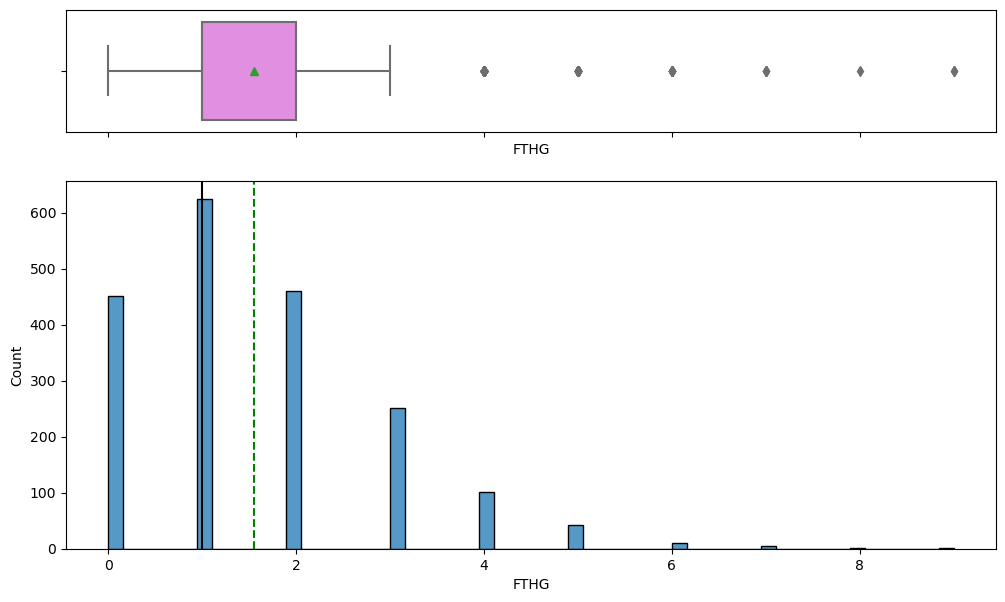

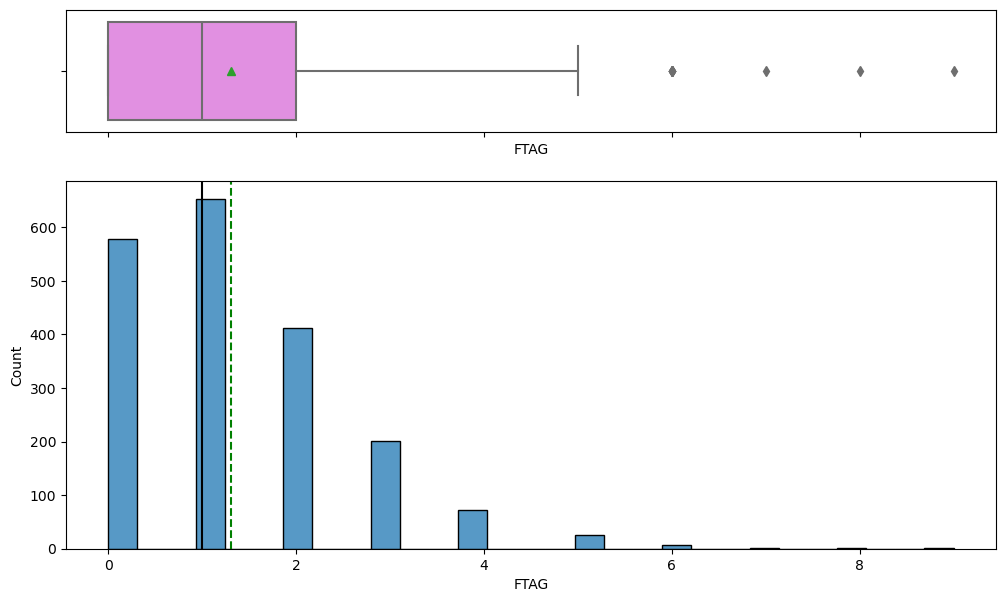

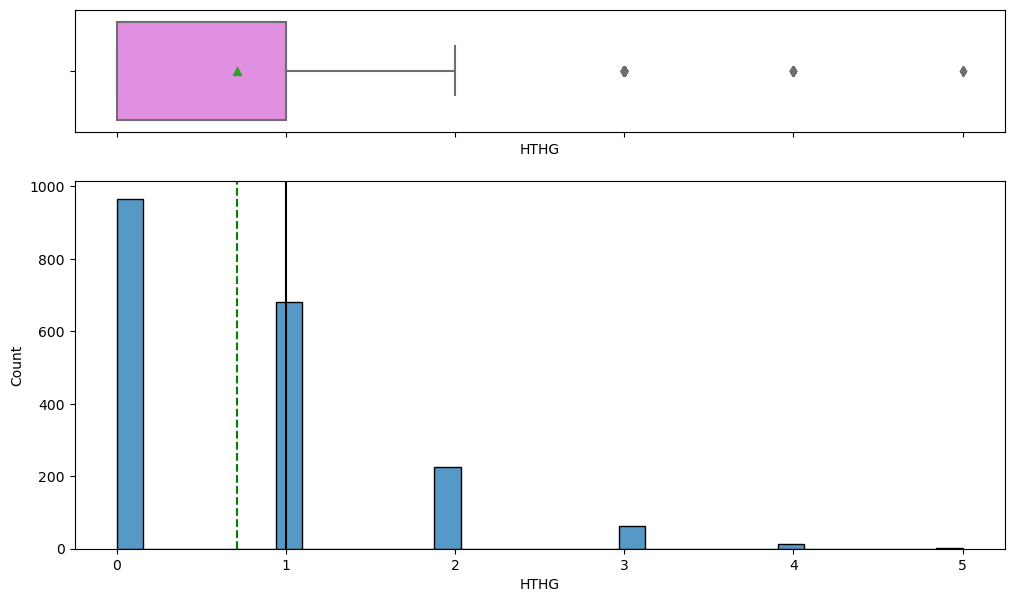

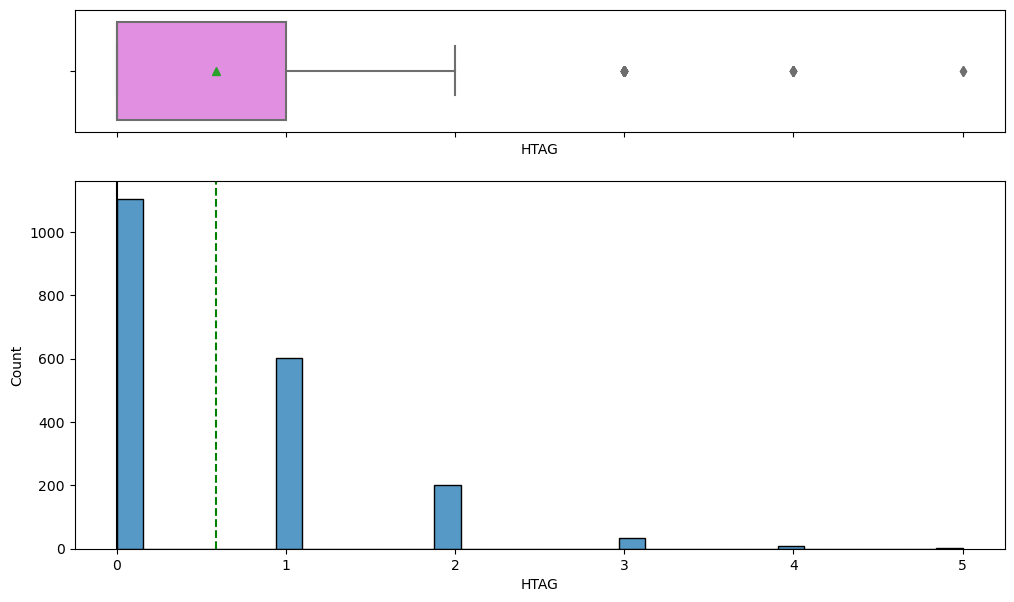

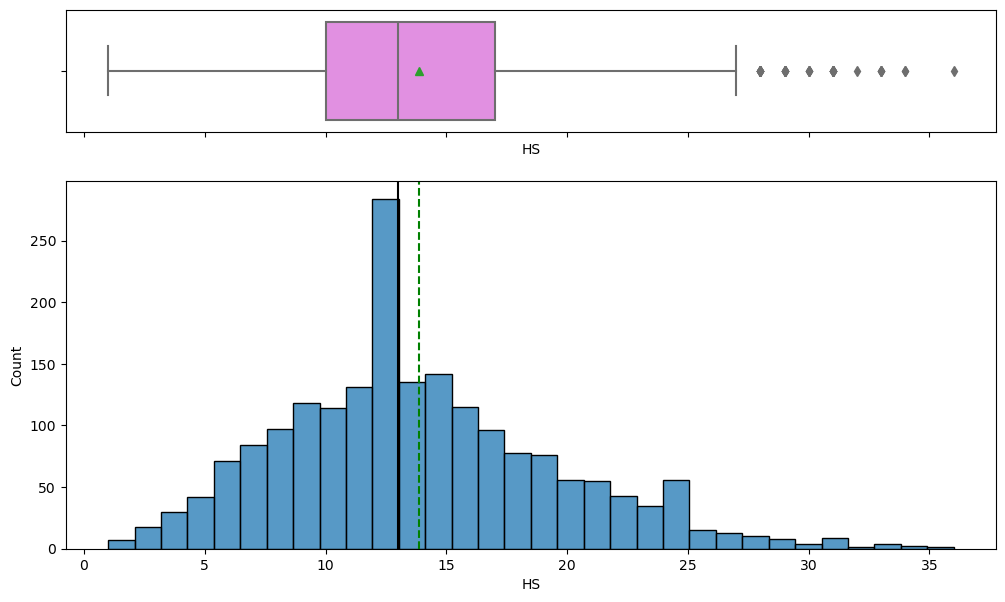

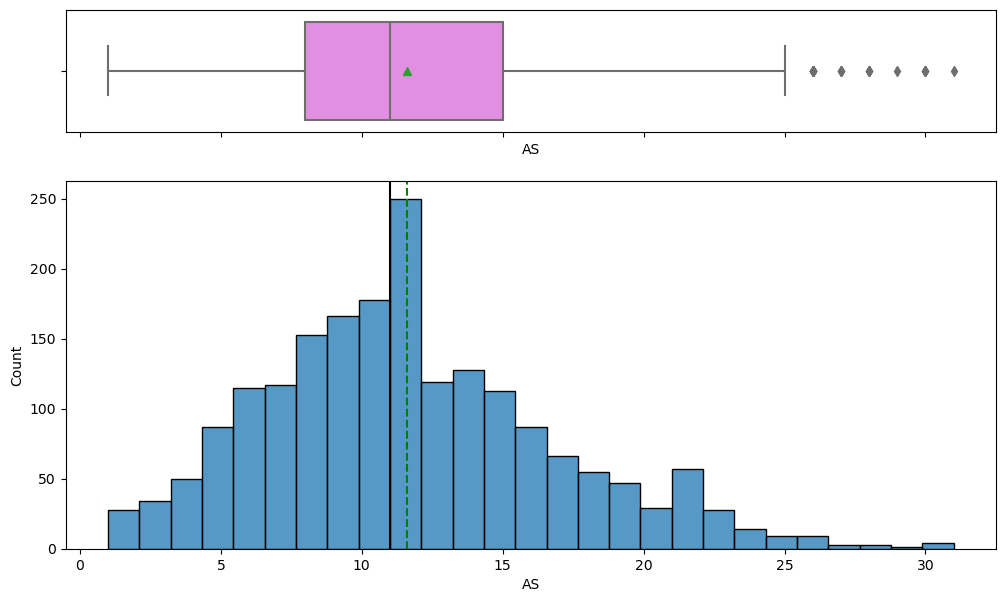

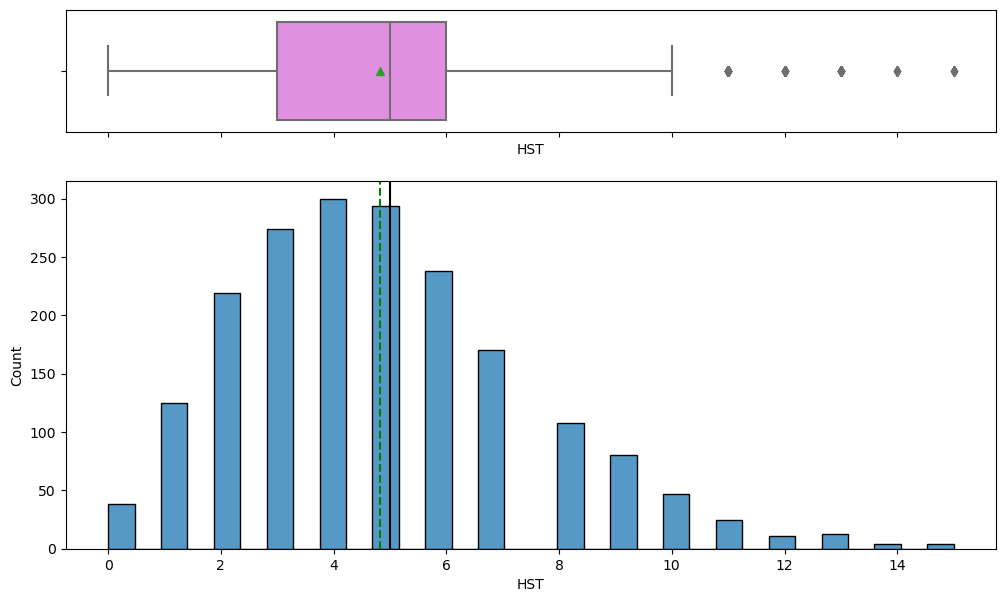

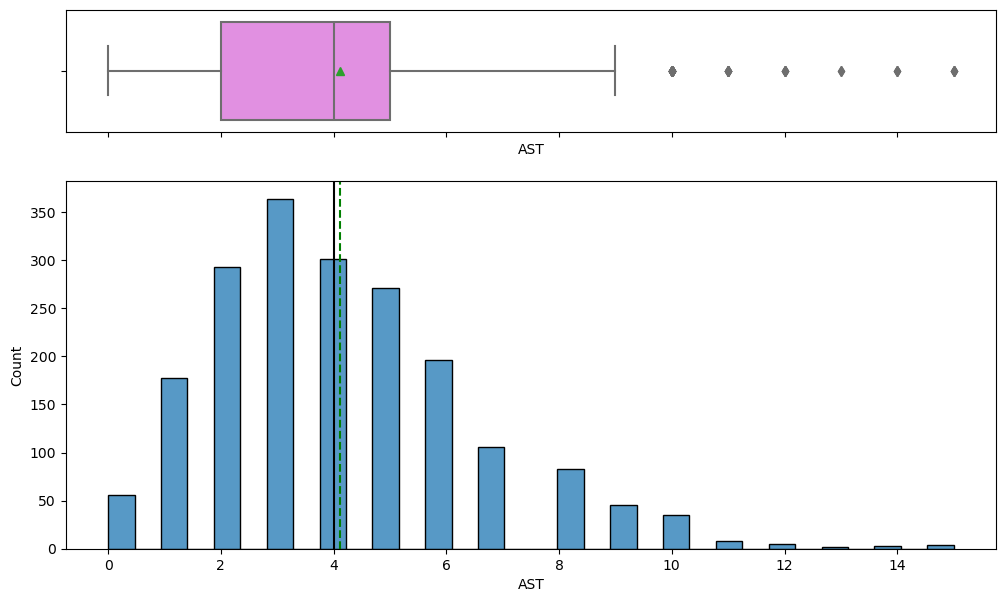

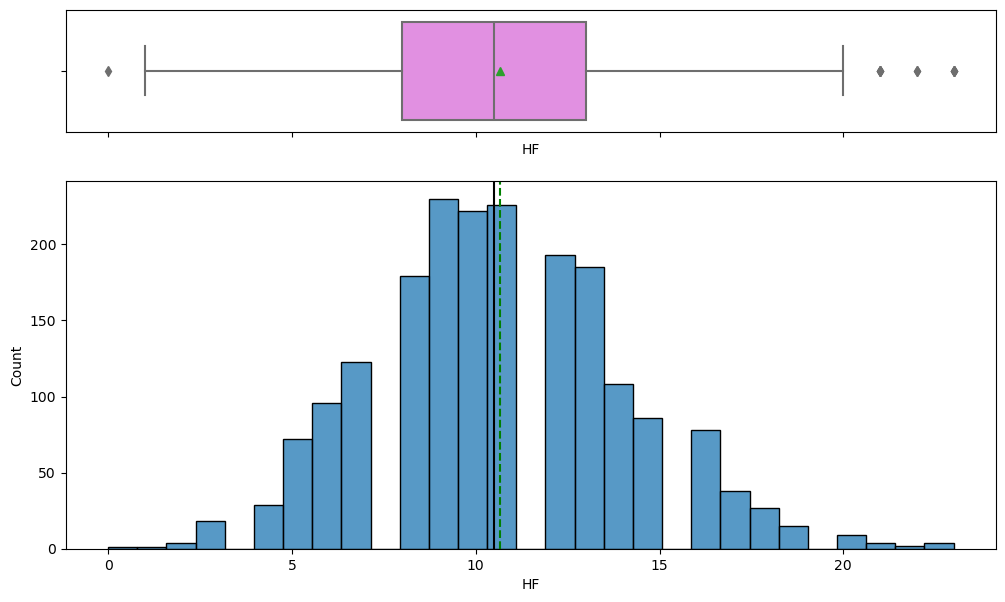

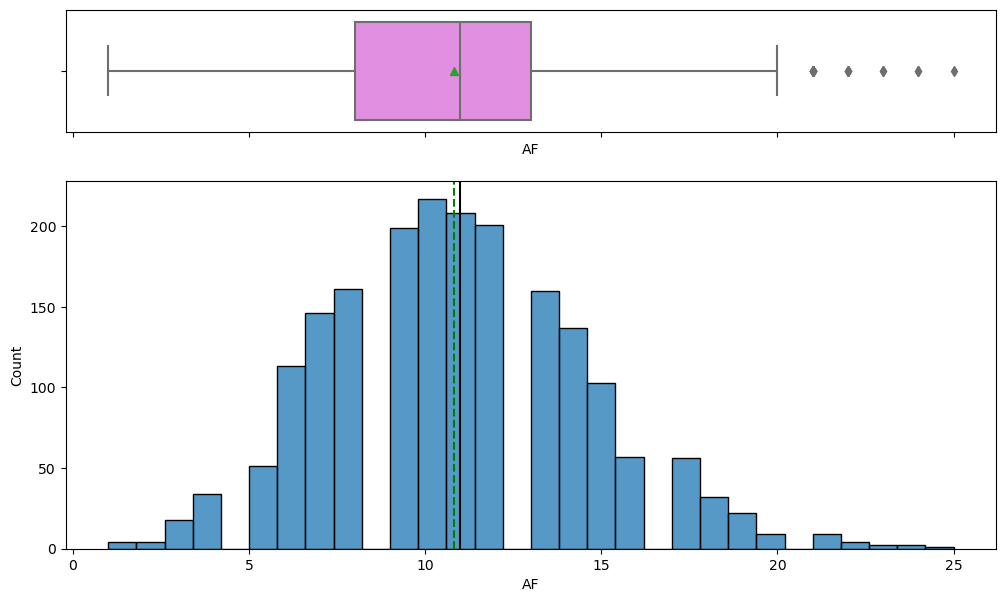

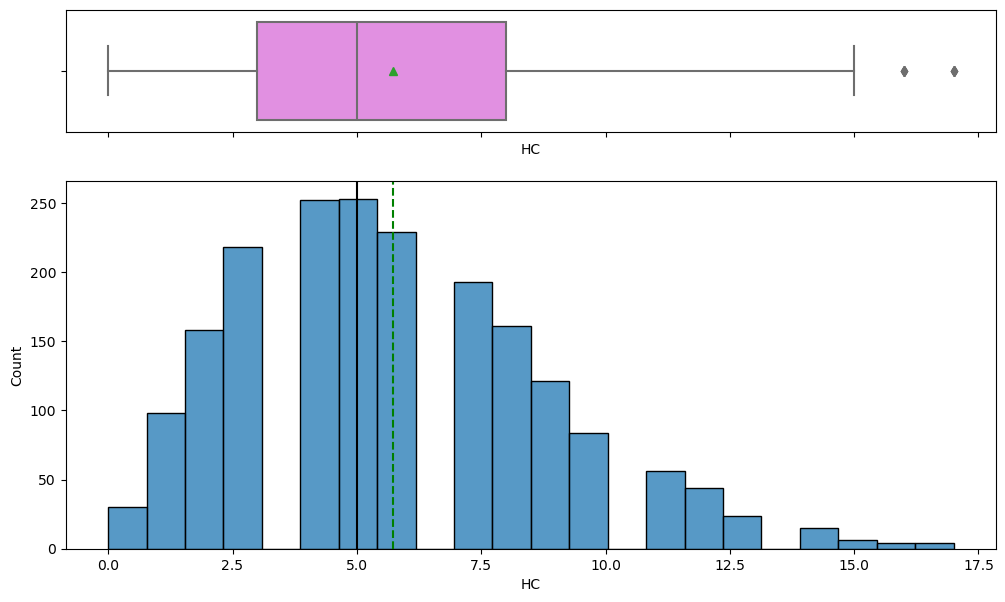

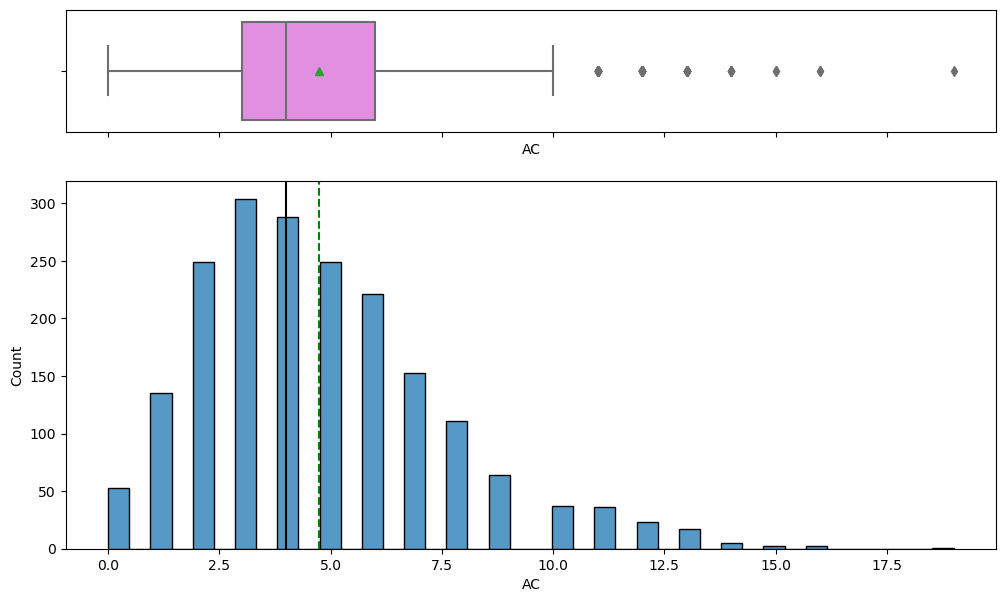

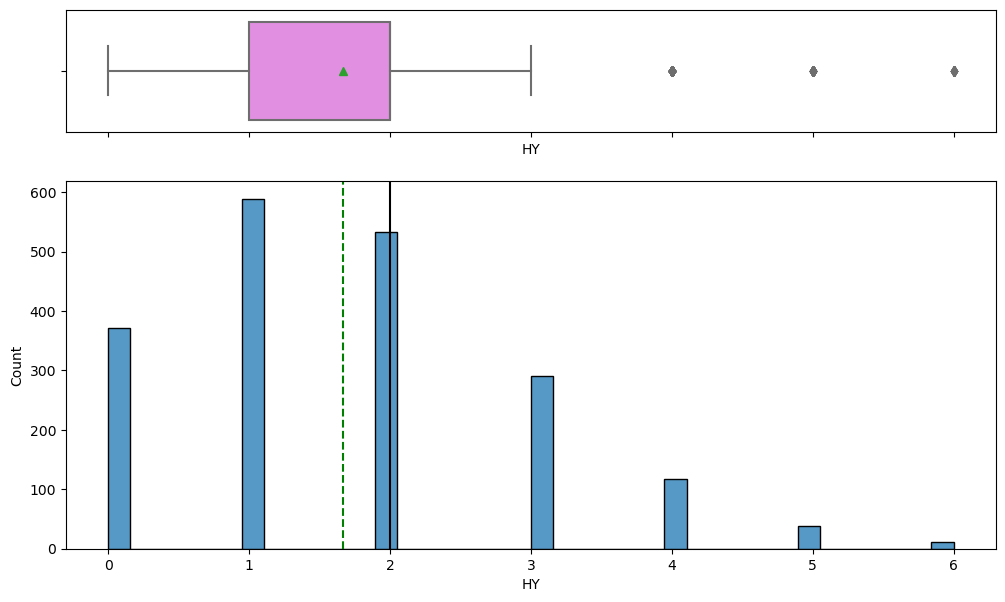

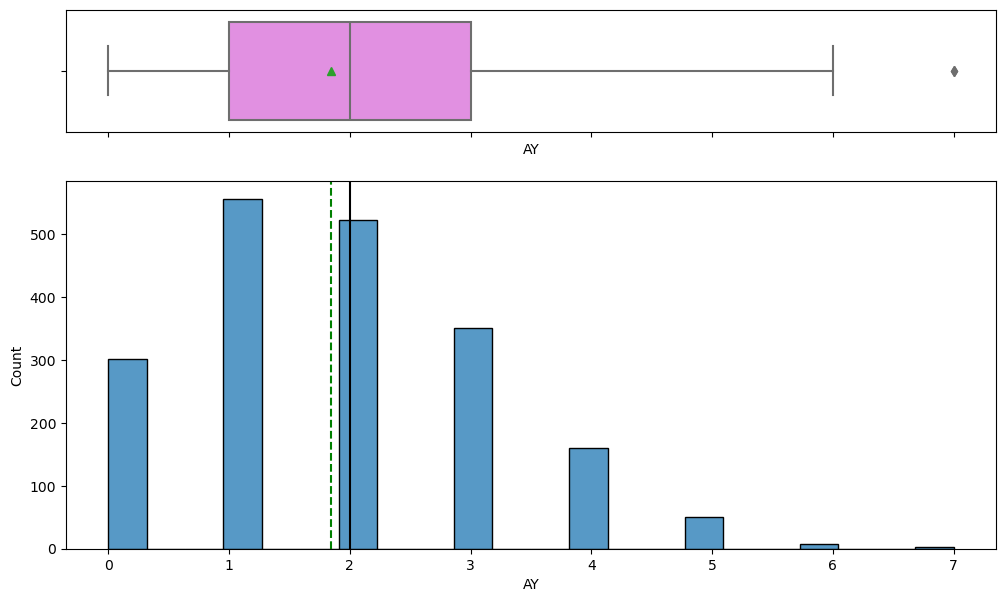

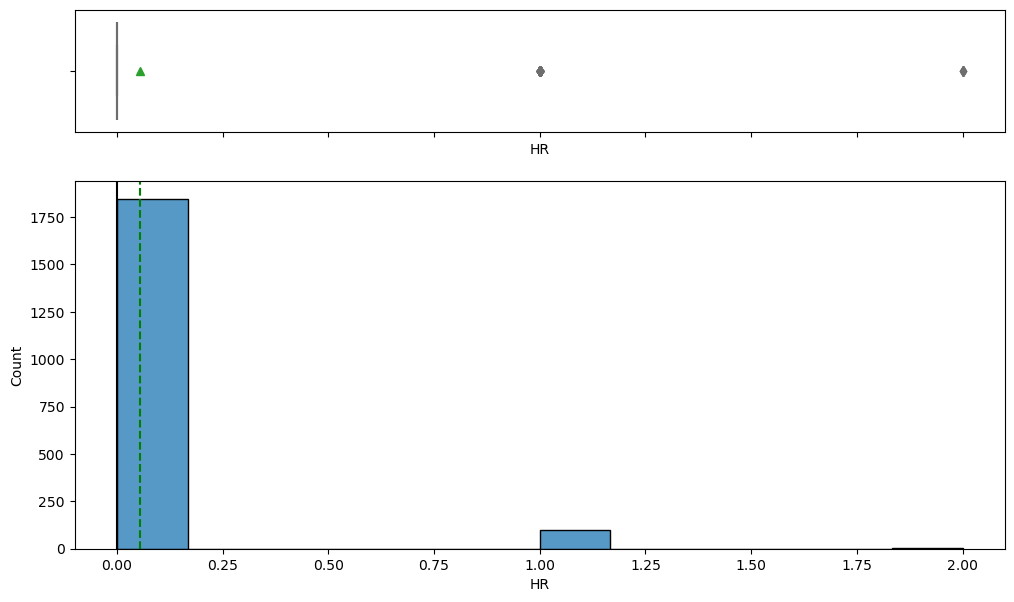

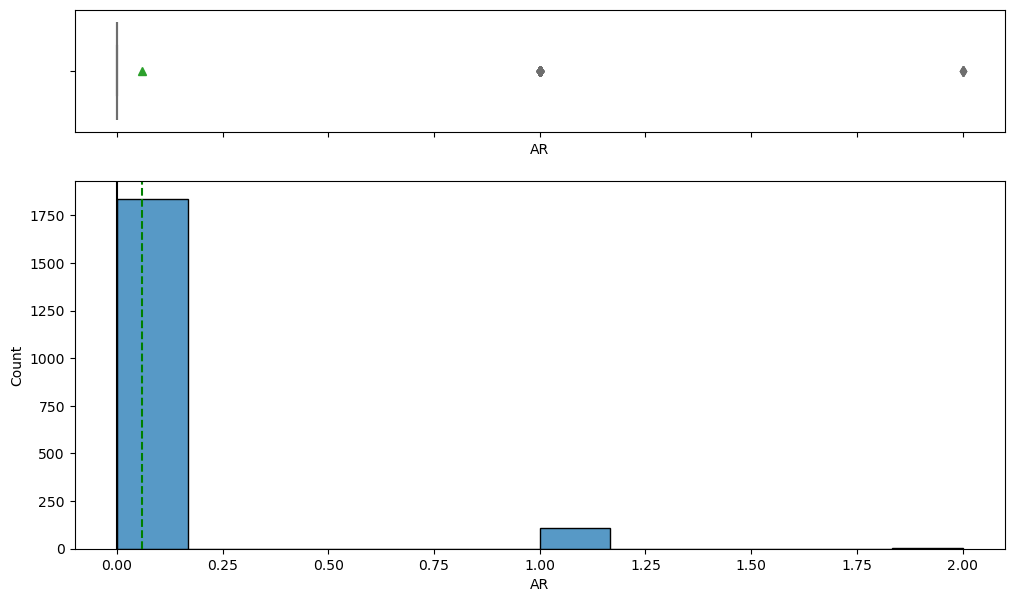

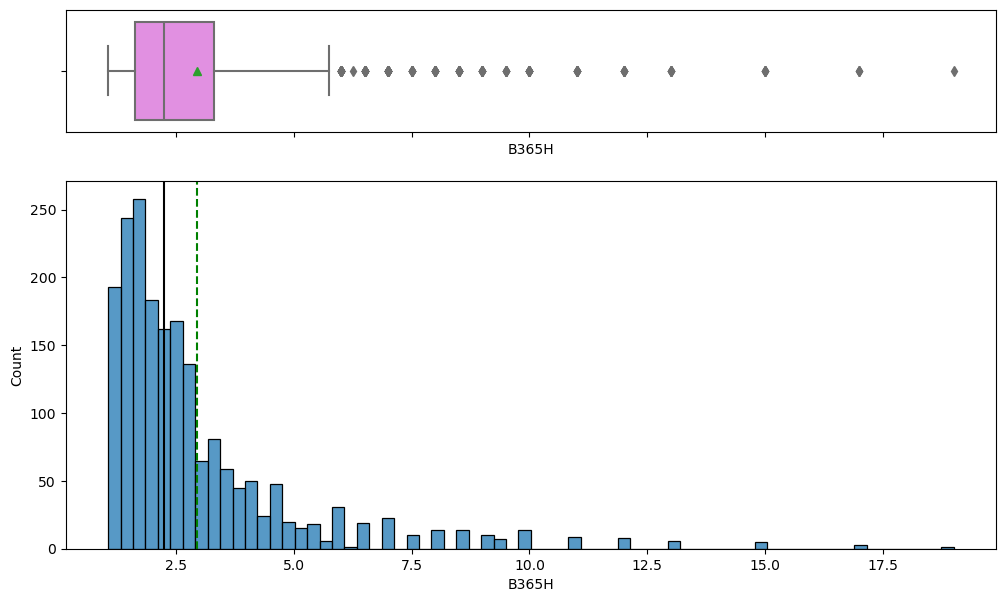

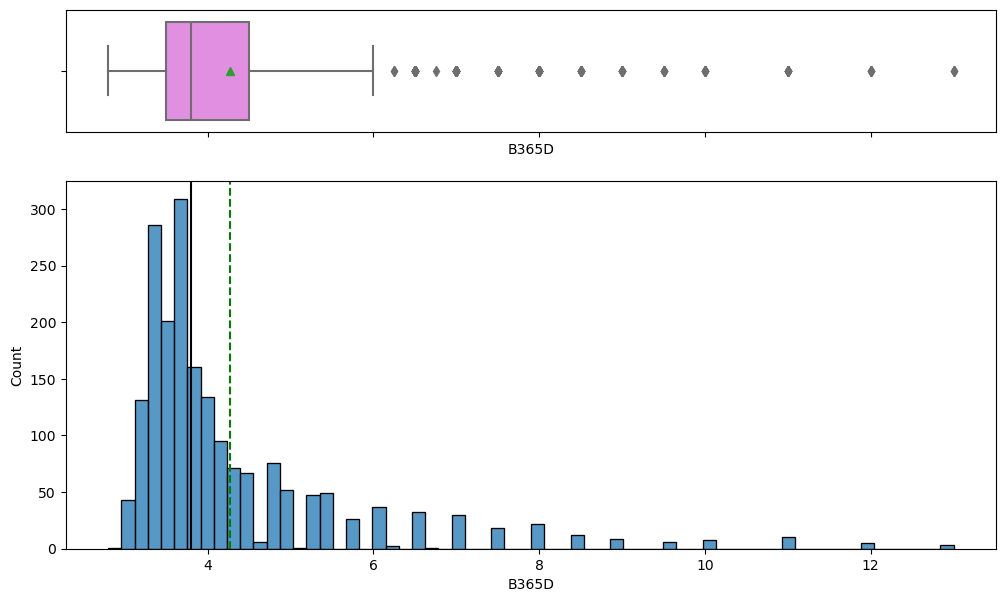

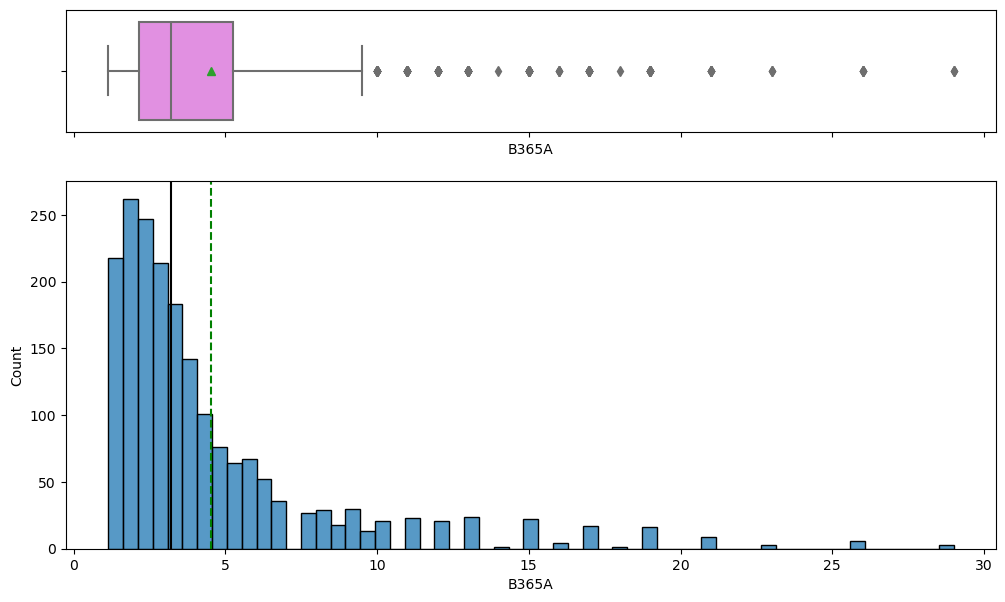

In [19]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Loop through the numerical columns and generate the plots
for feature in numerical_columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)


### Categorical Columns

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on HomeTeam

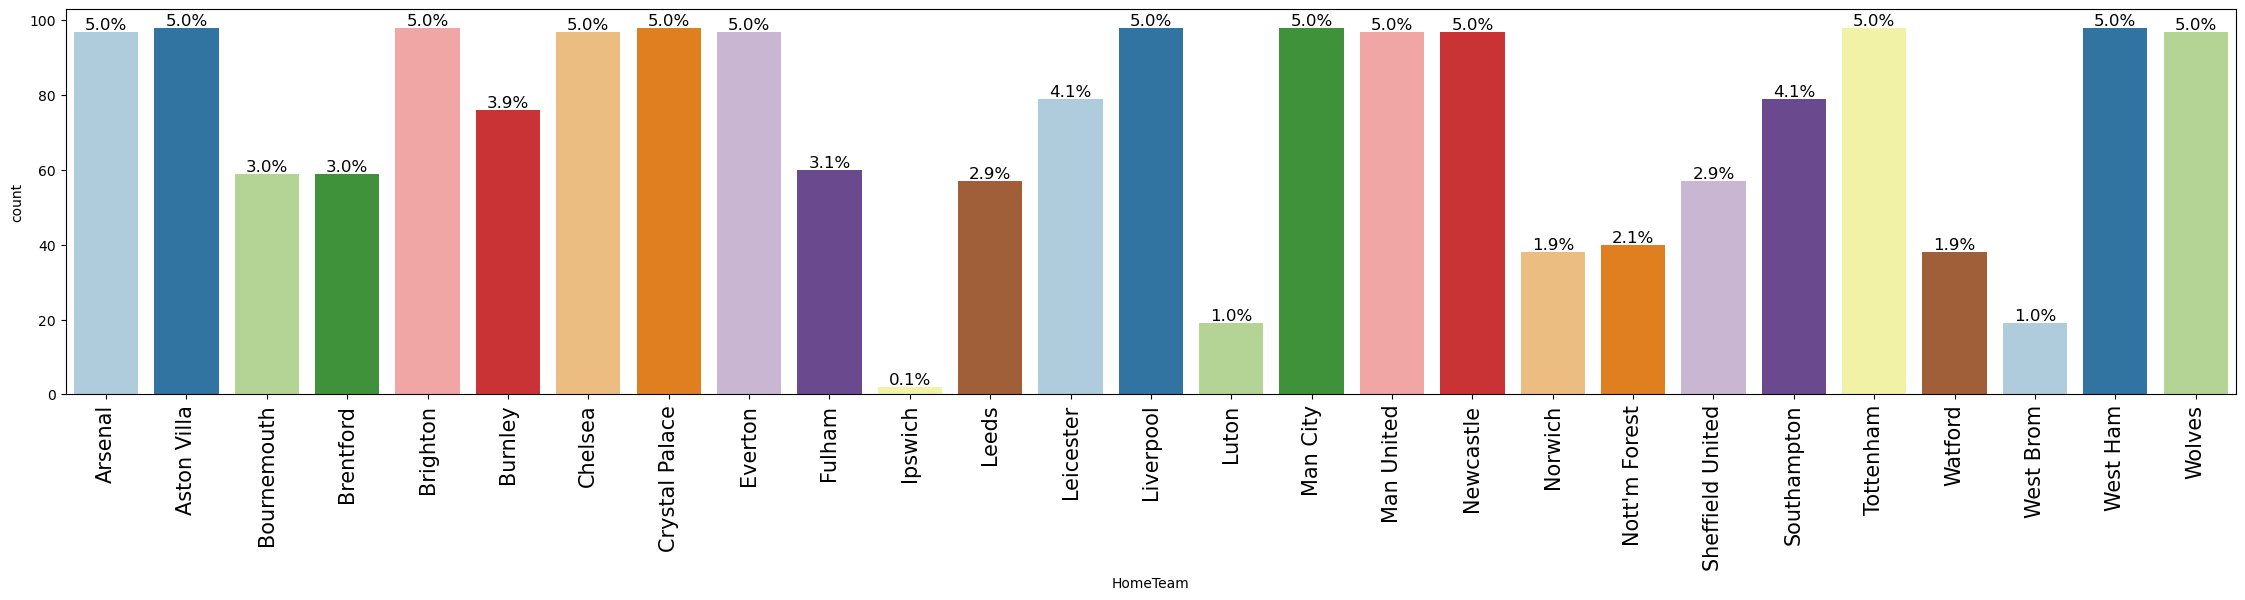

In [21]:
labeled_barplot(df, "HomeTeam", perc=True) 

### Observations on AwayTeam

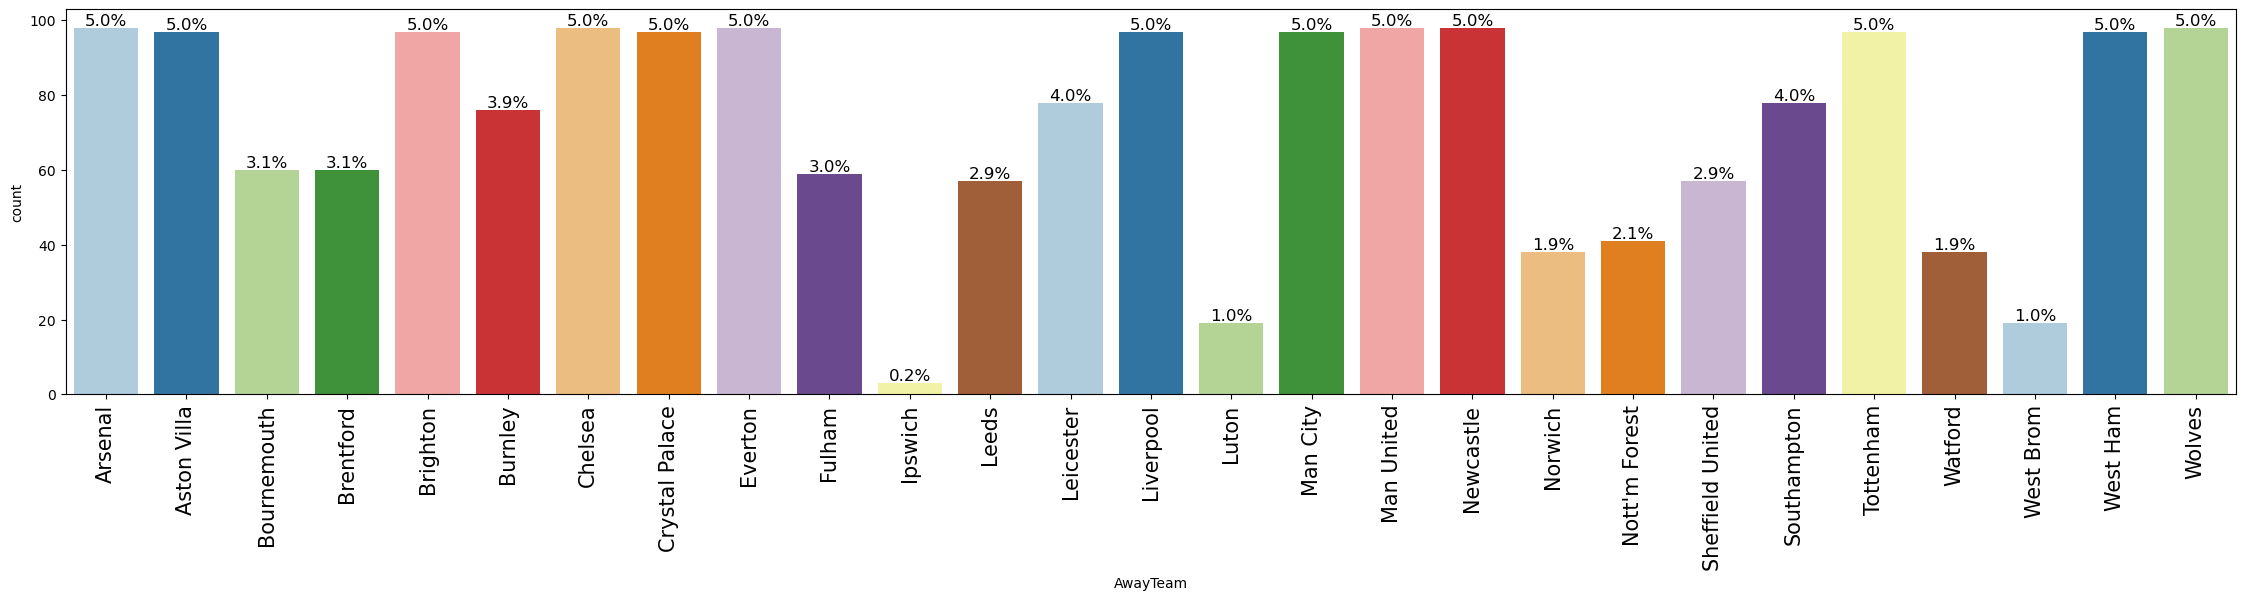

In [22]:
labeled_barplot(df, "AwayTeam", perc=True) 

- Many health facilities in the county are sponsored by the county government(97%) followed by CBO(3.0%)

### Observations on FULL TIME RESULTS

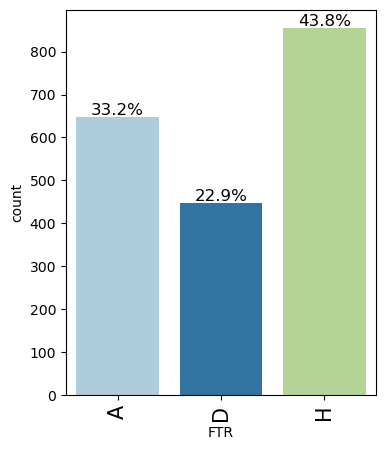

In [23]:
labeled_barplot(df, "FTR", perc=True) 

### Observations on HALF TIME RESULTS

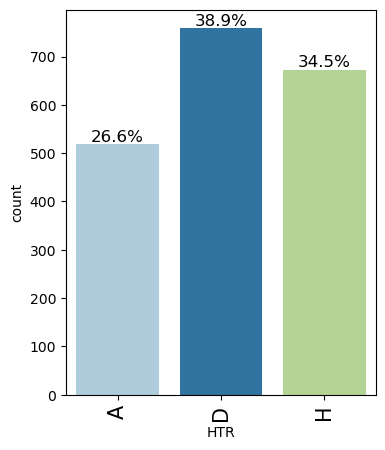

In [24]:
labeled_barplot(df, "HTR", perc=True) 

- This is a pairplot showing general distribution in numerical variables in our data.

## Bivariate And Multivariate Analysis

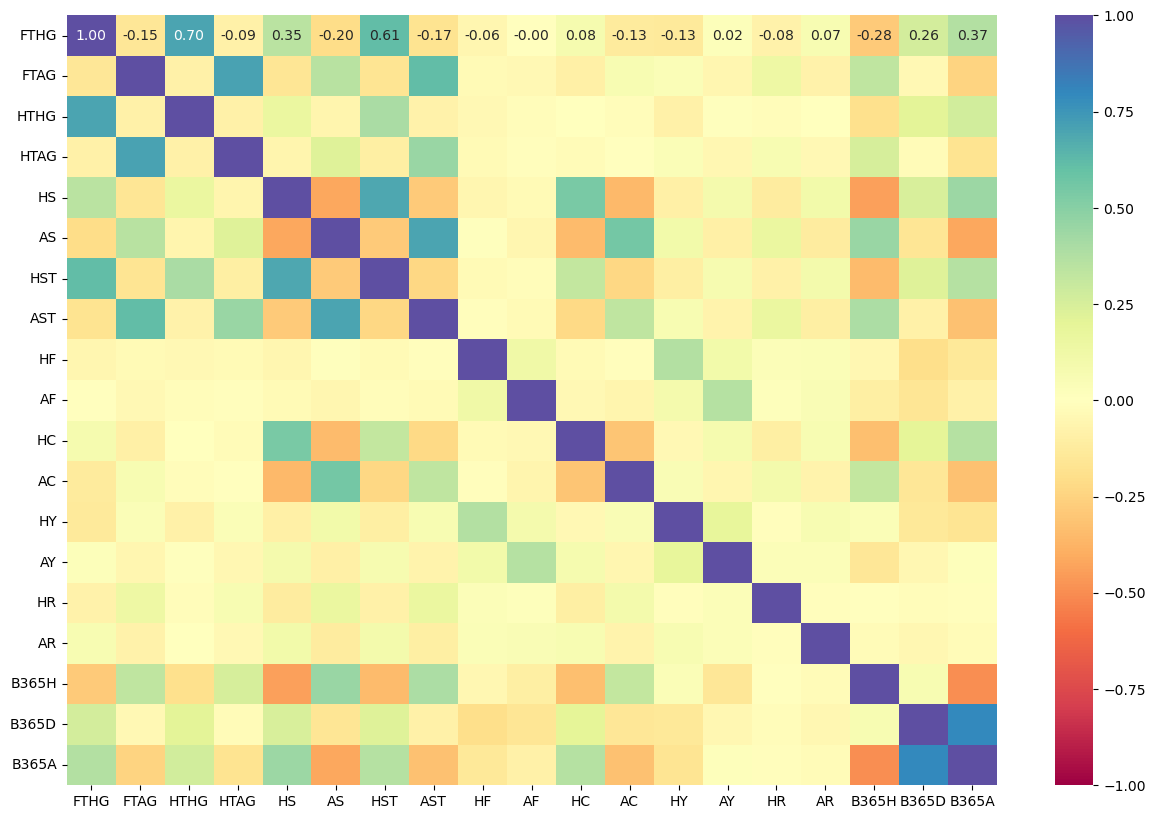

In [25]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Plotting the heatmap with the correlation matrix of the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(),vmin=-1, vmax=1, annot=True, fmt='.2f',cmap="Spectral")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [26]:
df.duplicated().sum()

0

In [27]:
# Removing duplicates
#data.drop_duplicates(keep=False, inplace=True)

In [28]:
df.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
dtype: int64

In [29]:
# we first create a copy of the data to avoid changes to it
df = df.copy()

### Outlier Check

- Let's check for outliers in the data.

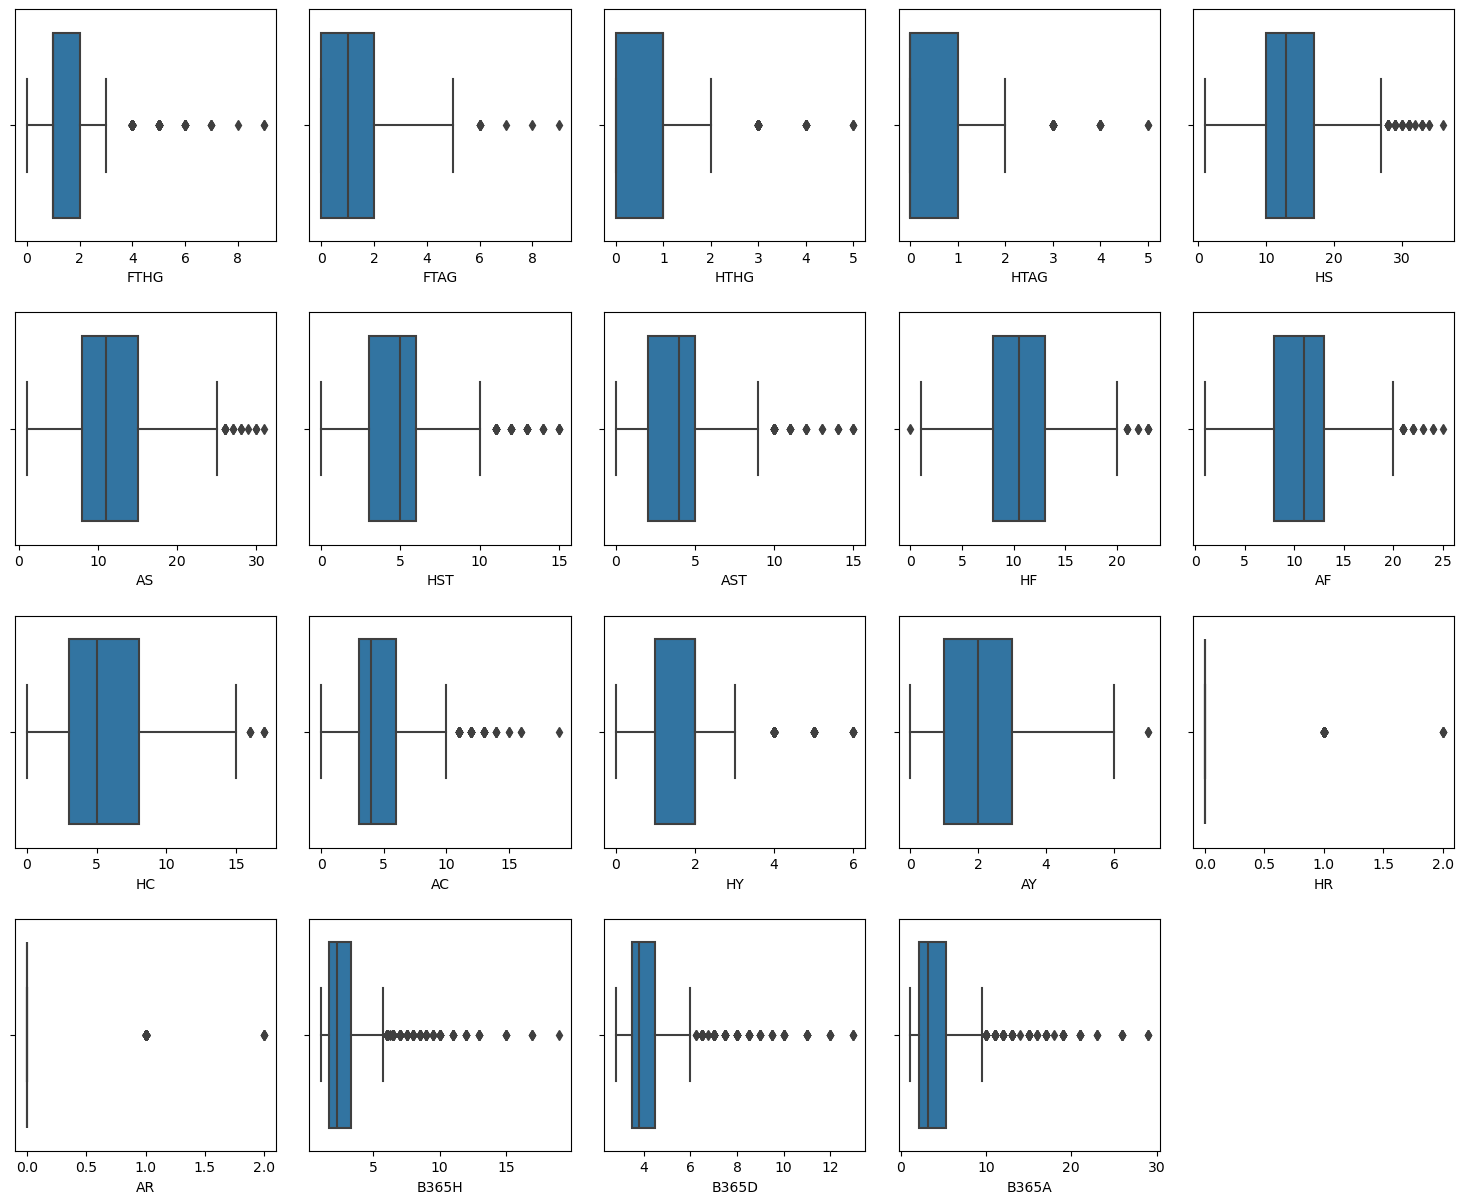

In [30]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Treating Outliers

In [31]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

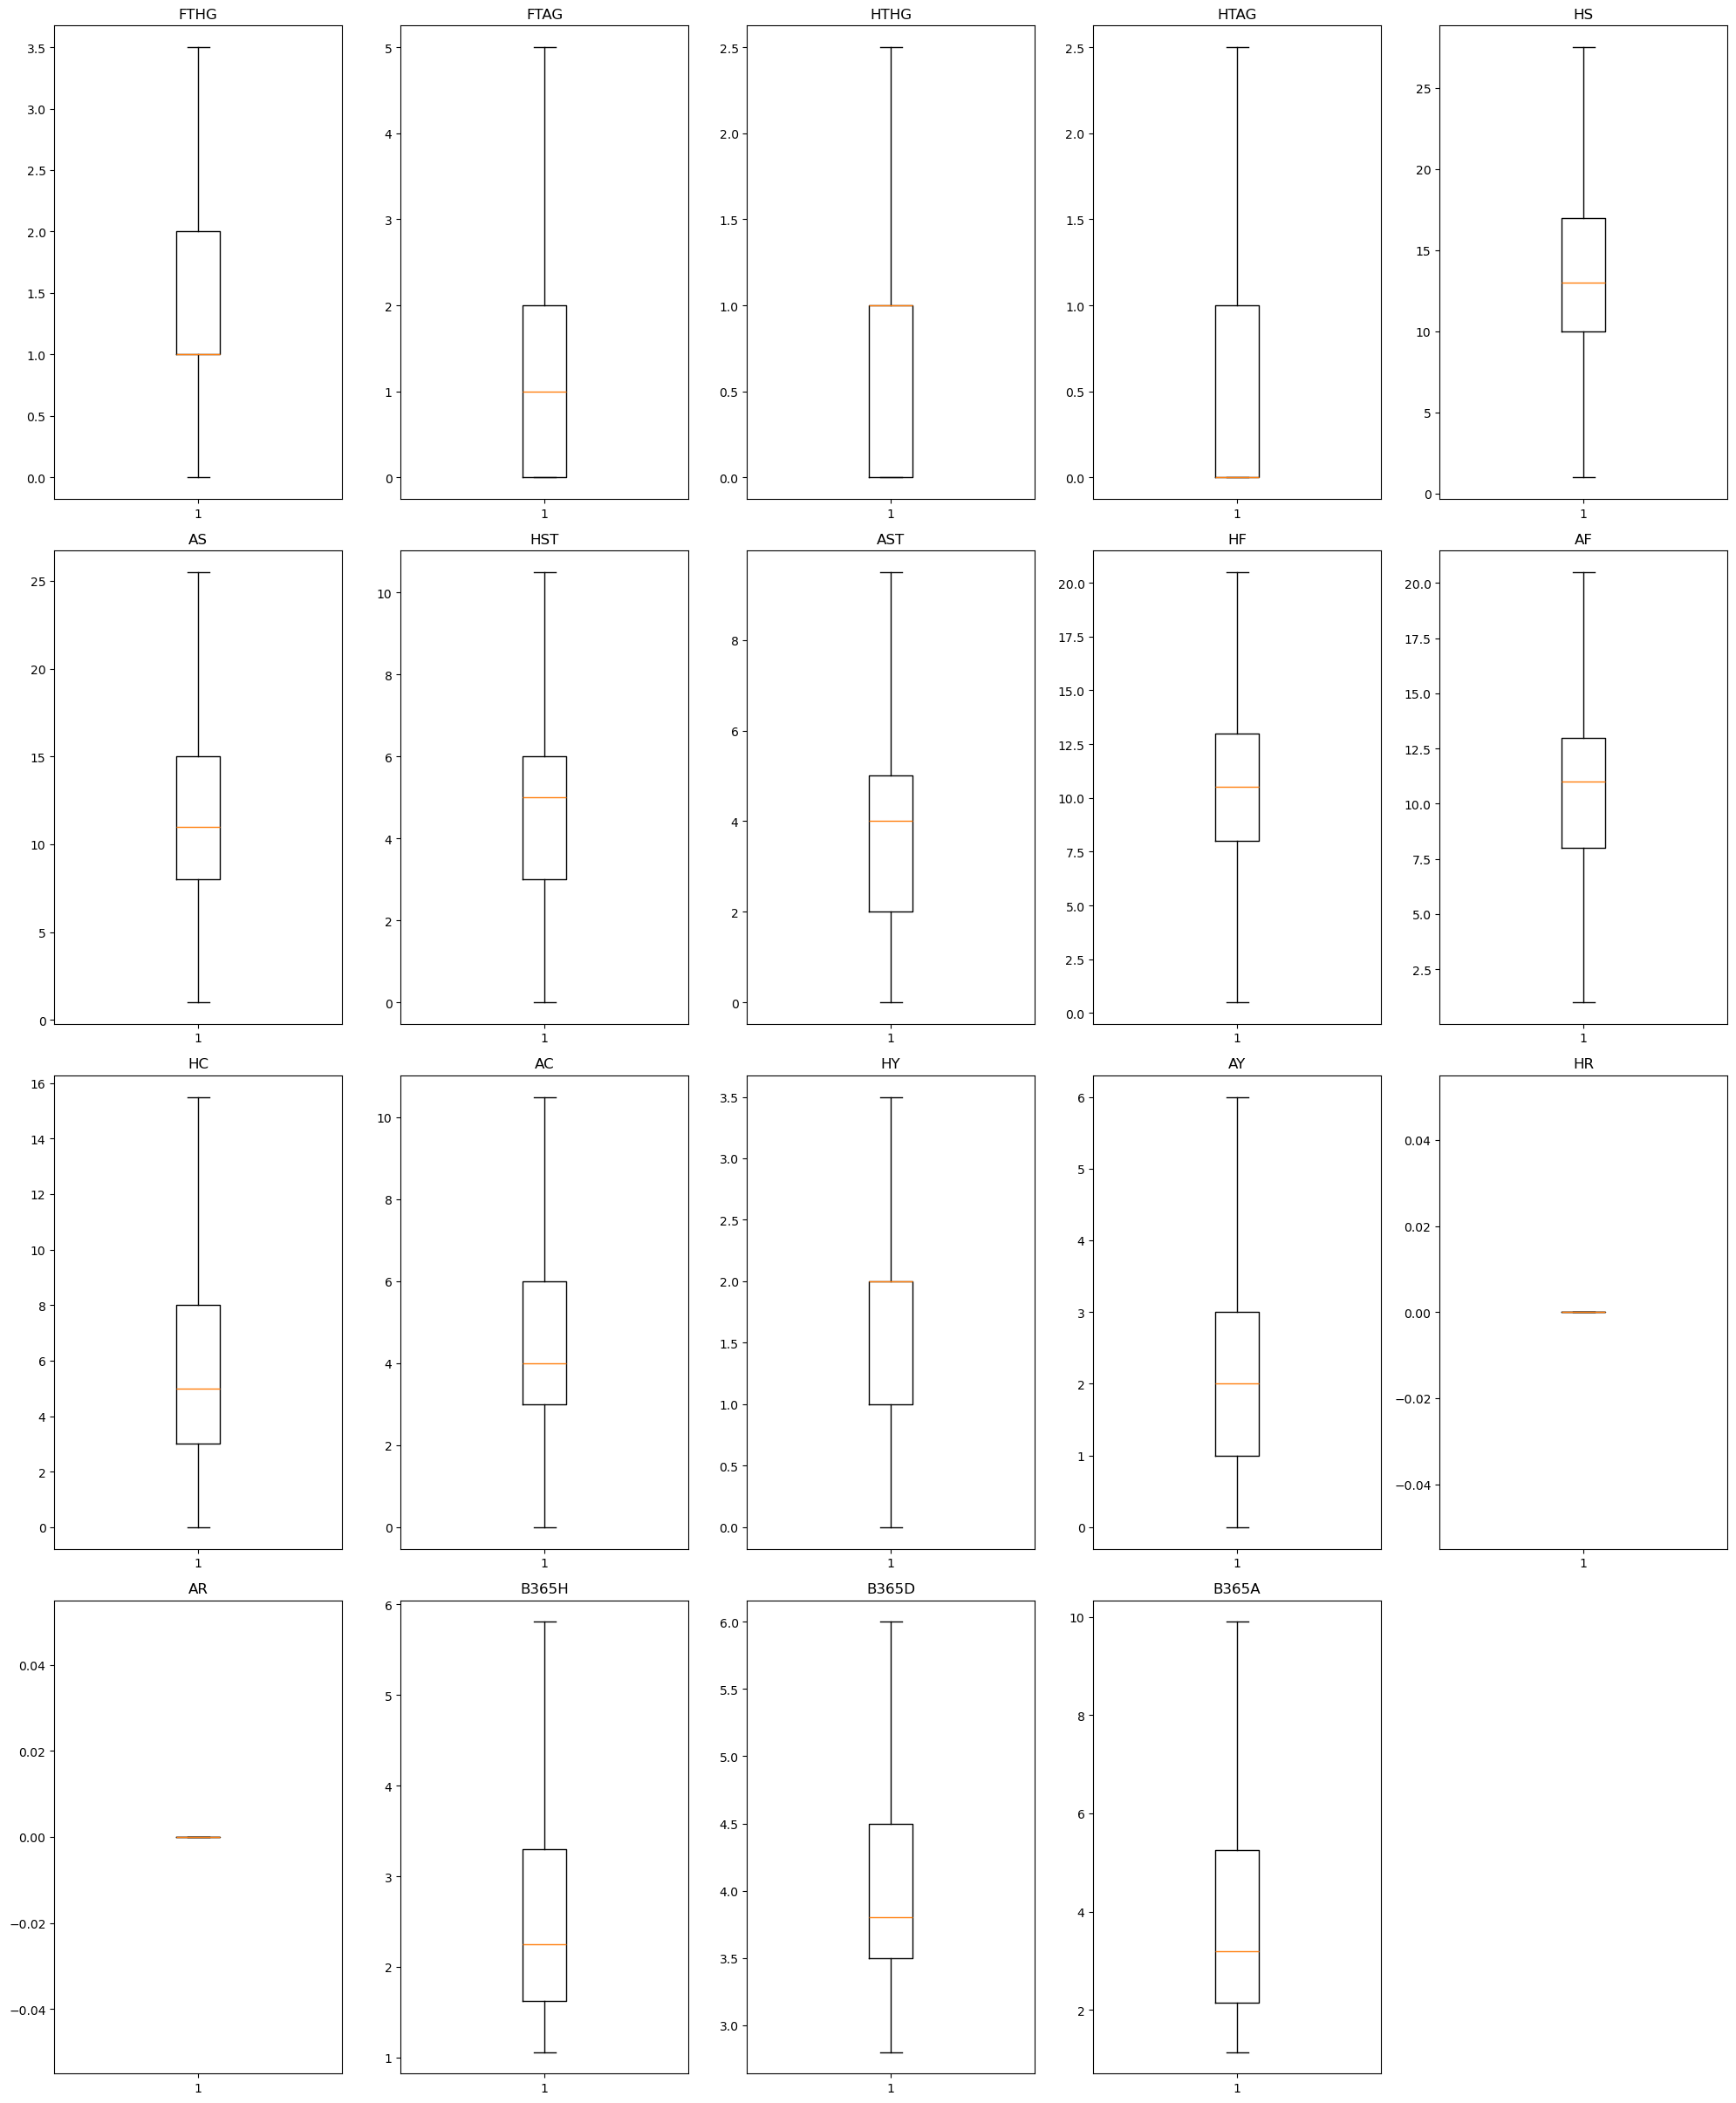

In [32]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [33]:
# Define the mapping dictionary to encode FTR and HTR columns
mapping = {'H': 1, 'D': 2, 'A': 3}
df[['FTR', 'HTR']] = df[['FTR', 'HTR']].replace(mapping)

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
* This is done using the `stratify` parameter in the train_test_split function.

In [34]:
X = df.drop(['FTR'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['FTR']

In [35]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,...,AwayTeam_Newcastle,AwayTeam_Norwich,AwayTeam_Nott'm Forest,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves
0,3.5,1,2.5,0.0,1,15.0,12.0,7.0,5.0,9.0,...,False,True,False,False,False,False,False,False,False,False
1,0.0,5,0.0,1.0,3,5.0,14.0,3.0,9.0,6.0,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1,0.0,0.0,2,13.0,8.0,3.0,3.0,10.0,...,False,False,False,True,False,False,False,False,False,False
3,3.0,0,0.0,0.0,2,10.0,11.0,4.0,3.0,6.0,...,False,False,False,False,True,False,False,False,False,False
4,0.0,0,0.0,0.0,2,6.0,10.0,2.0,3.0,16.0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1560, 693) (390, 693)


In [37]:
y.value_counts(1)

FTR
1    0.438462
3    0.332308
2    0.229231
Name: proportion, dtype: float64

In [38]:
y_test.value_counts(1)

FTR
1    0.438462
3    0.333333
2    0.228205
Name: proportion, dtype: float64

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the there is availability of space but in reality, there is no space.

2. Model predicts that there is no availability of space but in reality, there is space. 

### Which case is more important? 
* Both the cases are important as:

* If it predicts there is space but in reality there is no space the county government can allocate resources for the development of health facilities where there is no space thus leading to waste of resources. 

* If it predicts there is no space but in reality there is space, it might cause the desrving areas where the county government is supposed to allocate resources for health facilities construction to miss the allocation. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    # Make predictions
    pred = model.predict(predictors)
    
    # Compute metrics
    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred, average='weighted')  # Adjusted for multiclass
    precision = precision_score(target, pred, average='weighted')  # Adjusted for multiclass
    f1 = f1_score(target, pred, average='weighted')  # Adjusted for multiclass

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [40]:
def confusion_matrix_sklearn(model, predictors, target):
    # Make predictions
    y_pred = model.predict(predictors)
    
    # Get confusion matrix
    cm = confusion_matrix(target, y_pred)
    
    # Dynamically reshape the labels based on the confusion matrix size
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape)  # reshape based on the actual size of cm

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [41]:
#dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [42]:
dtree = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=1)


In [43]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

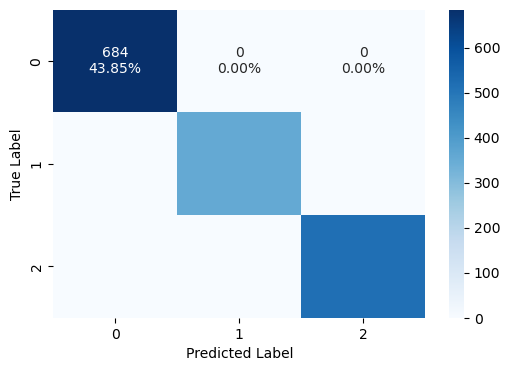

In [44]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* Space was available and the model predicted it correctly that there is space :  True Positive (observed=1,predicted=1)

* There was no space and the model predicted there is space : False Positive (observed=0,predicted=1)

* There was no space and the model predicted that there was no space : True Negative (observed=0,predicted=0)

* Space was available  and the model predicted it incorrectly that there is no space : False Negative (observed=1,predicted=0)

#### Checking model performance on training set

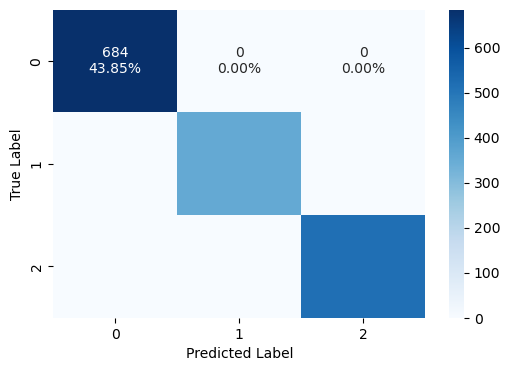

In [45]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [46]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

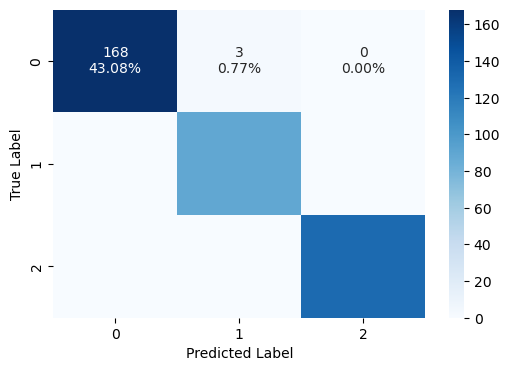

In [47]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [48]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.992308  0.992308   0.992559  0.992337


- There is no overfitting on the training data as both acuuracy, recall, precision and F1 for both training and testing data are equal. Therefore decision tree is working well for both training and testing data.

**Before pruning the tree let's check the important features.**

In [49]:
'''
feature_names = list(X_train.columns)
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
'''

'\nfeature_names = list(X_train.columns)\nimportances = dtree.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(8, 8))\nplt.title("Feature Importances")\nplt.barh(range(len(indices)), importances[indices], color="violet", align="center")\nplt.yticks(range(len(indices)), [feature_names[i] for i in indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

### Pruning the tree

**Pre-Pruning**

In [50]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

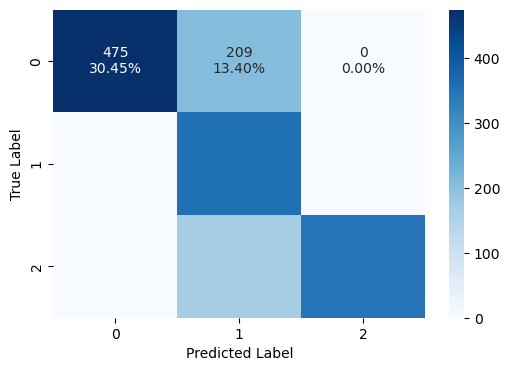

In [51]:
 #Training Performance
confusion_matrix_sklearn(estimator, X_train, y_train)

In [52]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.758333,0.758333,0.88229,0.77751


#### Checking performance on test set

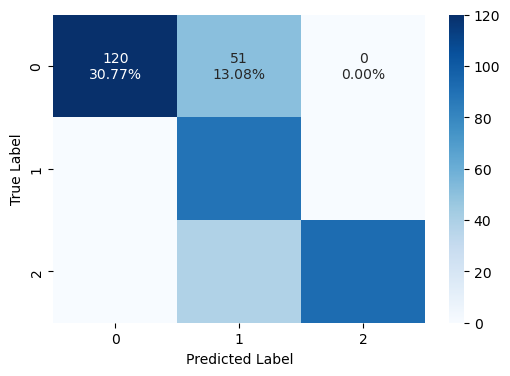

In [53]:
# Testing Performance
confusion_matrix_sklearn(estimator, X_test, y_test)

In [54]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.758333,0.758333,0.88229,0.77751


- After pruning the accuracy, recall and F1 reduced for the training data but increased for testing data

### Visualizing the Decision Tree

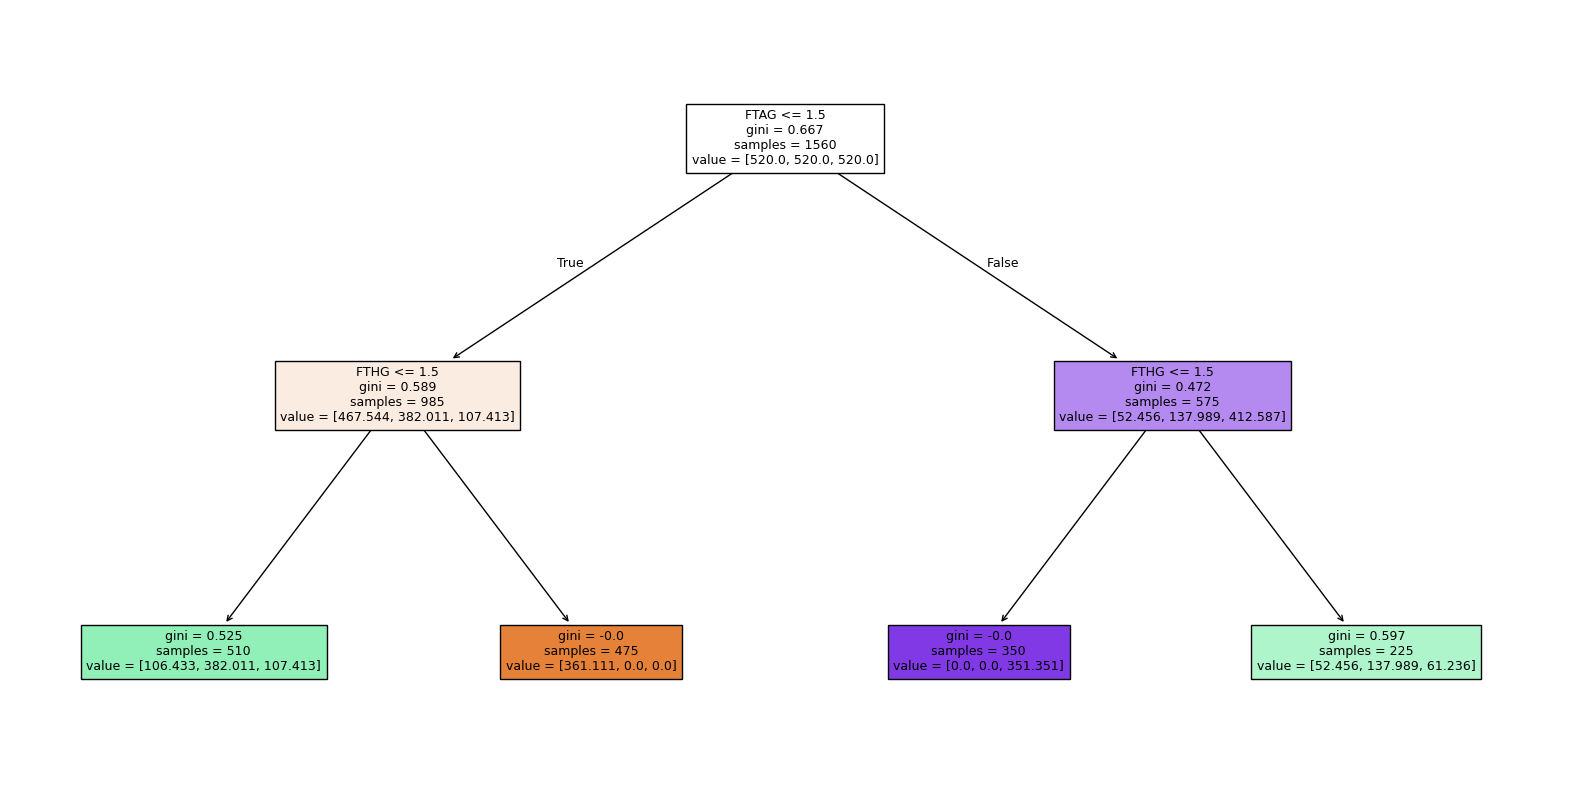

In [55]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- The above is the decision tree that will help us to come with a decision if there is space or not. The root node in this case which will guide in decision making is the paremeter no capacity. If the sample satisfies the condition then it goes to the left i f it exists otherwise it goes to the right.  

In [56]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- FTAG <= 1.50
|   |--- FTHG <= 1.50
|   |   |--- weights: [106.43, 382.01, 107.41] class: 2
|   |--- FTHG >  1.50
|   |   |--- weights: [361.11, 0.00, 0.00] class: 1
|--- FTAG >  1.50
|   |--- FTHG <= 1.50
|   |   |--- weights: [0.00, 0.00, 351.35] class: 3
|   |--- FTHG >  1.50
|   |   |--- weights: [52.46, 137.99, 61.24] class: 2



In [57]:
# importance of features in the tree building
'''

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
'''

'\n\nimportances = estimator.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(8, 8))\nplt.title("Feature Importances")\nplt.barh(range(len(indices)), importances[indices], color="violet", align="center")\nplt.yticks(range(len(indices)), [feature_names[i] for i in indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

- Important features for the prediction after the tree is pruned are:no capacity, Murang'a south and good status.

### Cost Complexity Pruning
**Let's try pruning the tree and see if the performance improves.**

In [58]:
d_tree = DecisionTreeClassifier(random_state=0)
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [59]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.003022,0.003022
2,0.004151,0.007173
3,0.005427,0.012601
4,0.011331,0.023932
5,0.035211,0.094353
6,0.066986,0.295311
7,0.071689,0.367000
8,0.128486,0.495486
9,0.149343,0.644829


In [60]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14934298776159238


In [61]:
recall_train = []
for clf in clfs_list:
    pred_train = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train, average='macro')  # or 'micro' or 'weighted'
    recall_train.append(values_train)


In [62]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test,average='macro')
    recall_test.append(values_test)

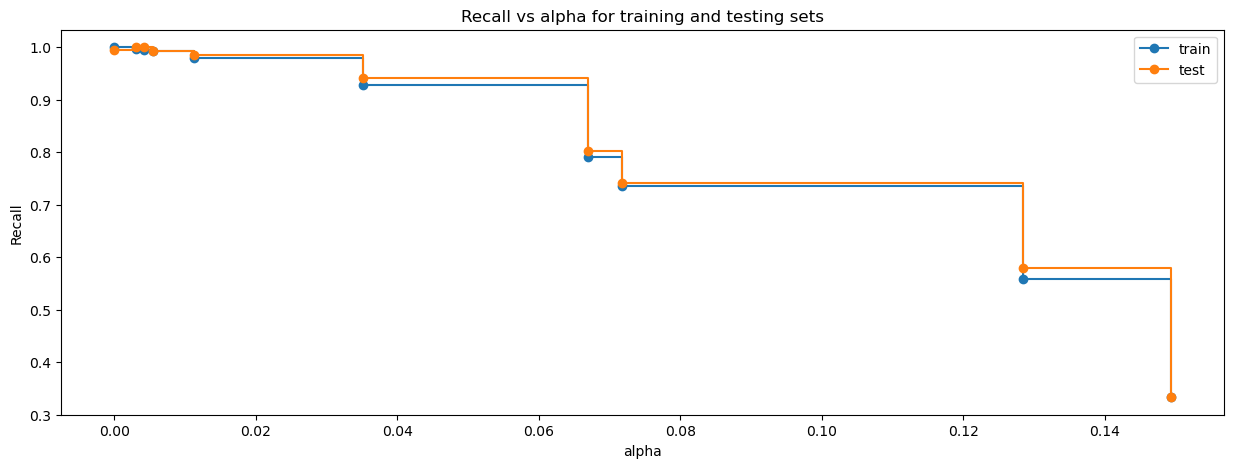

In [63]:
#Plotting the graph for Recall VS alpha 
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

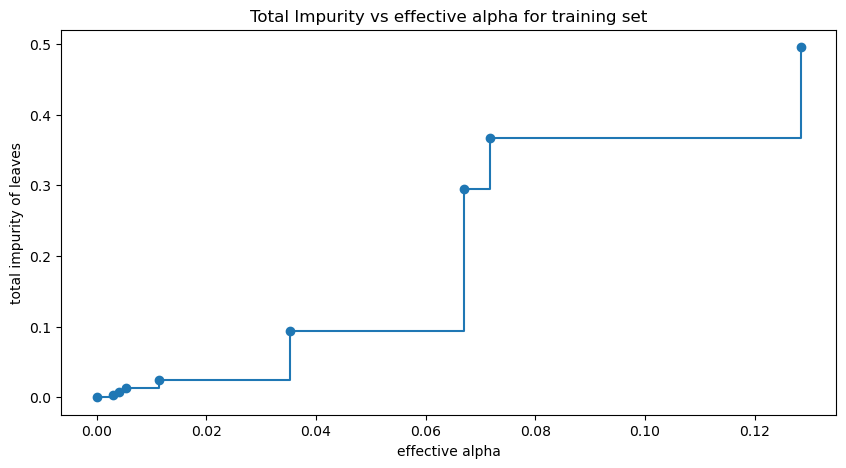

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

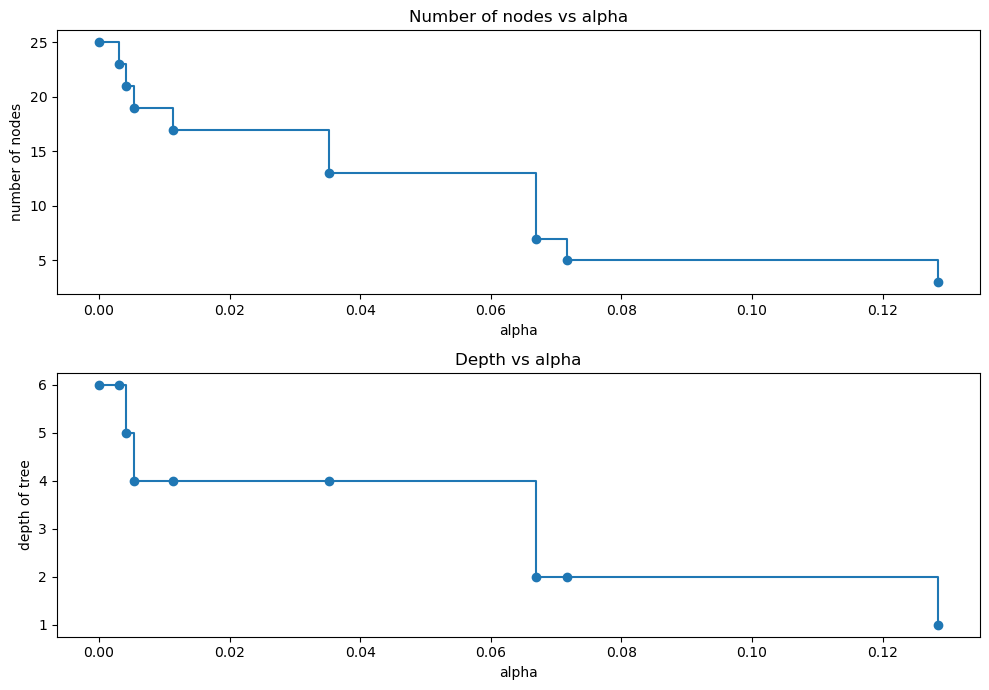

In [65]:
clfs = clfs_list[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Training performance:
    Accuracy    Recall  Precision        F1
0  0.998077  0.998077   0.998085  0.998075
Testing performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


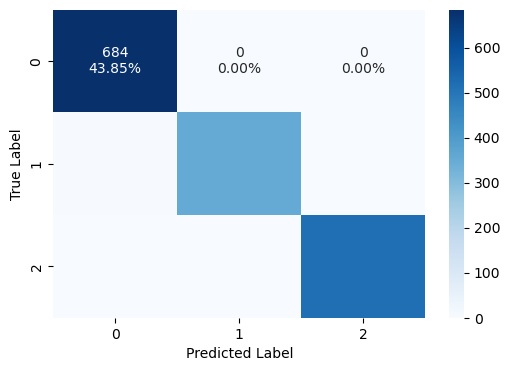

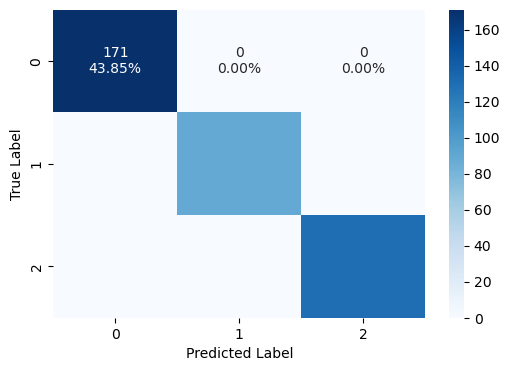

In [66]:
# Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

# Calculating different metrics
pruned_dtree_model_train_perf = model_performance_classification_sklearn(
    pruned_dtree_model, X_train, y_train
)
print("Training performance:\n", pruned_dtree_model_train_perf)
pruned_dtree_model_test_perf = model_performance_classification_sklearn(
    pruned_dtree_model, X_test, y_test
)
print("Testing performance:\n", pruned_dtree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(pruned_dtree_model, X_train, y_train)
confusion_matrix_sklearn(pruned_dtree_model, X_test, y_test)

- After complexity pruning accuracy and F1 remained the same while recall increased and precision decreased for the training data.

- Recall and F1 increased while accuracy and precision decreased for the training data.

### F1 Score vs alpha for training and testing sets

In [67]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train,average='macro')
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test,average='macro')
    f1_test.append(values_test)

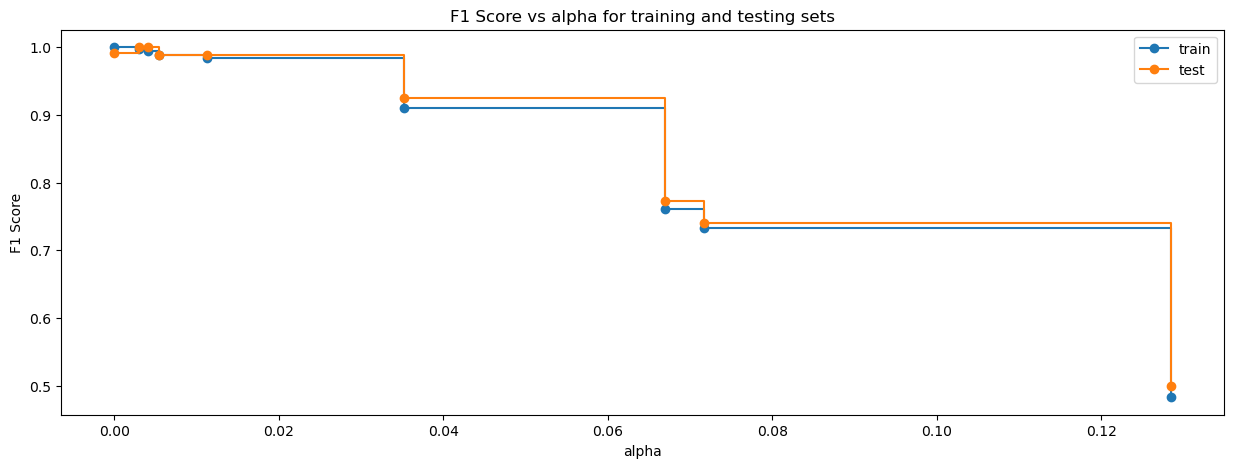

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [69]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0030219780219780225, random_state=1)


#### Checking performance on training set

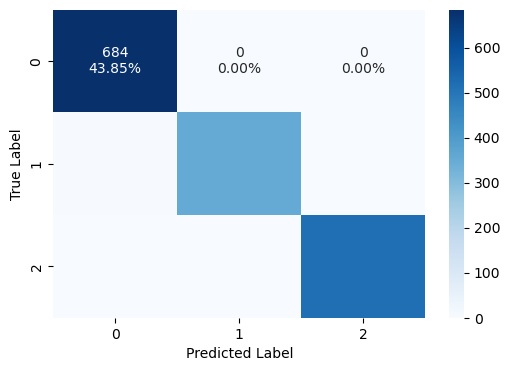

In [70]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [71]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.998077,0.998077,0.998085,0.998075


#### Checking performance on test set

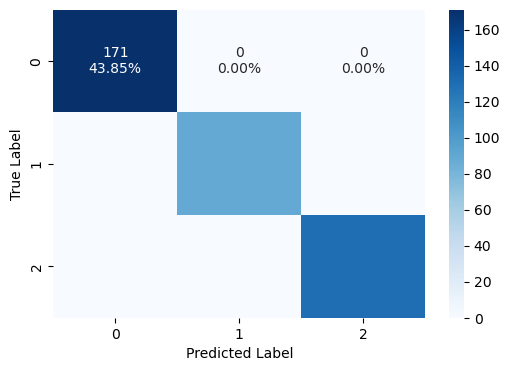

In [72]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [73]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


- No overfitting for F1 and alpha in our training and test sets

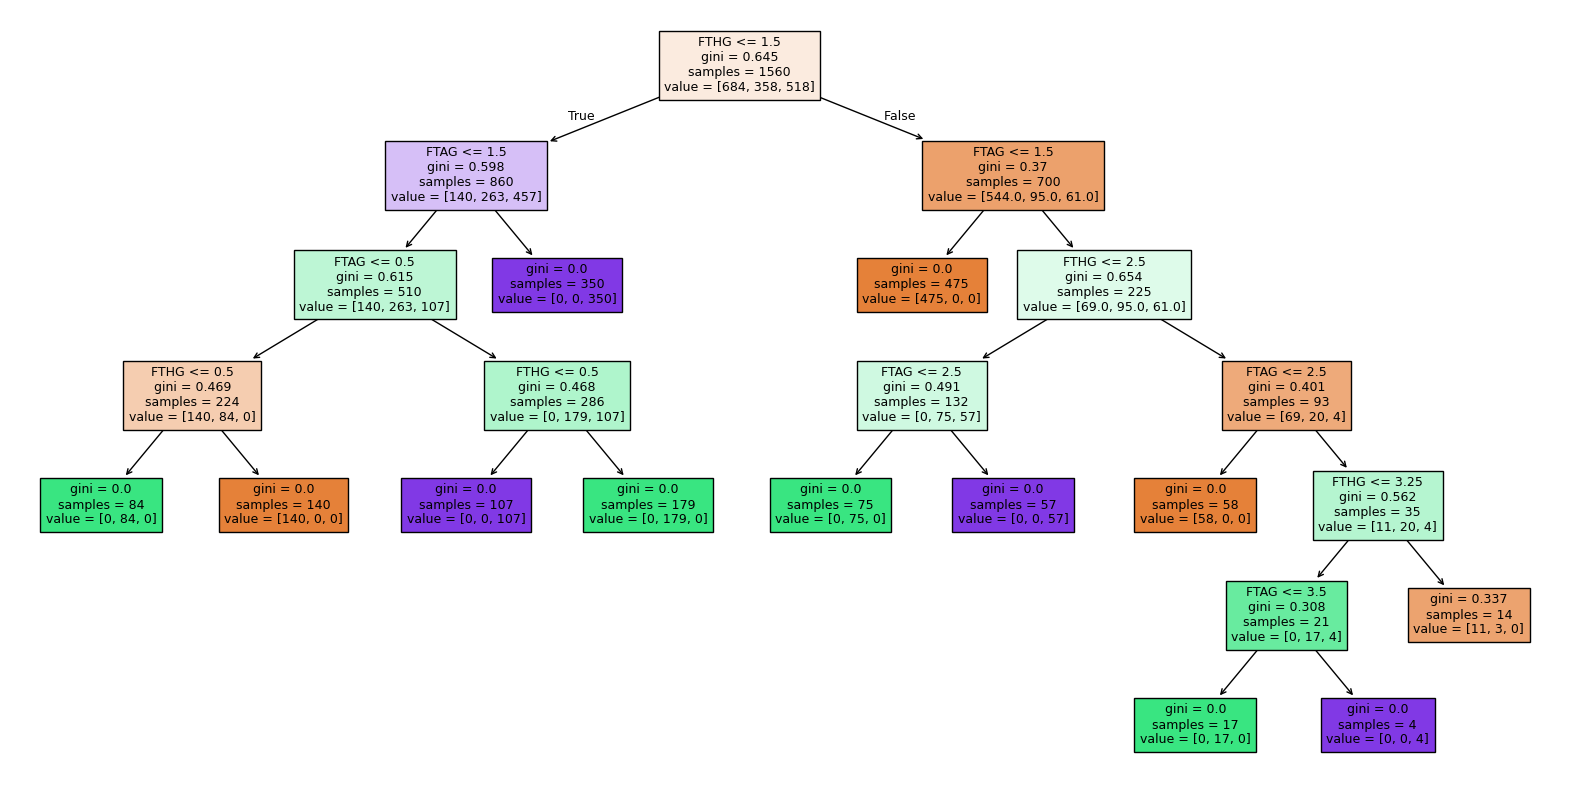

In [74]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- Our tree after complexity training.

In [75]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- FTHG <= 1.50
|   |--- FTAG <= 1.50
|   |   |--- FTAG <= 0.50
|   |   |   |--- FTHG <= 0.50
|   |   |   |   |--- weights: [0.00, 84.00, 0.00] class: 2
|   |   |   |--- FTHG >  0.50
|   |   |   |   |--- weights: [140.00, 0.00, 0.00] class: 1
|   |   |--- FTAG >  0.50
|   |   |   |--- FTHG <= 0.50
|   |   |   |   |--- weights: [0.00, 0.00, 107.00] class: 3
|   |   |   |--- FTHG >  0.50
|   |   |   |   |--- weights: [0.00, 179.00, 0.00] class: 2
|   |--- FTAG >  1.50
|   |   |--- weights: [0.00, 0.00, 350.00] class: 3
|--- FTHG >  1.50
|   |--- FTAG <= 1.50
|   |   |--- weights: [475.00, 0.00, 0.00] class: 1
|   |--- FTAG >  1.50
|   |   |--- FTHG <= 2.50
|   |   |   |--- FTAG <= 2.50
|   |   |   |   |--- weights: [0.00, 75.00, 0.00] class: 2
|   |   |   |--- FTAG >  2.50
|   |   |   |   |--- weights: [0.00, 0.00, 57.00] class: 3
|   |   |--- FTHG >  2.50
|   |   |   |--- FTAG <= 2.50
|   |   |   |   |--- weights: [58.00, 0.00, 0.00] class: 1
|   |   |   |--- FTAG >  2.50
|   |   |   

In [76]:
'''
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
'''

'\nimportances = best_model.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(12, 12))\nplt.title("Feature Importances")\nplt.barh(range(len(indices)), importances[indices], color="violet", align="center")\nplt.yticks(range(len(indices)), [feature_names[i] for i in indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

- After complex pruning has got only two important features that would be used for prediction.This features are:good status and no capacity.

### Hyperparameter Tuning

In [77]:
#Choose the type of classifier. 
dtree = DecisionTreeClassifier(criterion='gini', class_weight=None, random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 30), 
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_leaf_nodes': [2, 3, 5, 10, 15],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score, average='macro')  # Use macro for multiclass recall

# Run the grid search
grid_obj = GridSearchCV(dtree, parameters, scoring=scorer, n_jobs=-1)

# Fit the grid search to the data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the dtree to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the training data
dtree_estimator.fit(X_train, y_train)

# Now you can evaluate it on the test set
y_pred = dtree_estimator.predict(X_test)

# Calculate and print the recall score on the test set
recall_test = metrics.recall_score(y_test, y_pred, average='macro')  # Use macro for multiclass
print(f"Recall on test data: {recall_test}")


Recall on test data: 0.9941520467836257


#### Checking model performance on training set

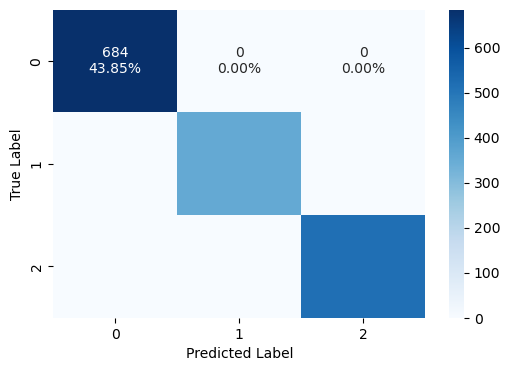

In [78]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [79]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

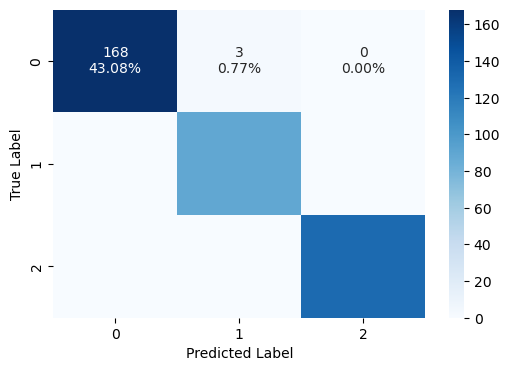

In [80]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [81]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.992308  0.992308   0.992559  0.992337


- There is no overfitting on our training data after our model has been tuned.

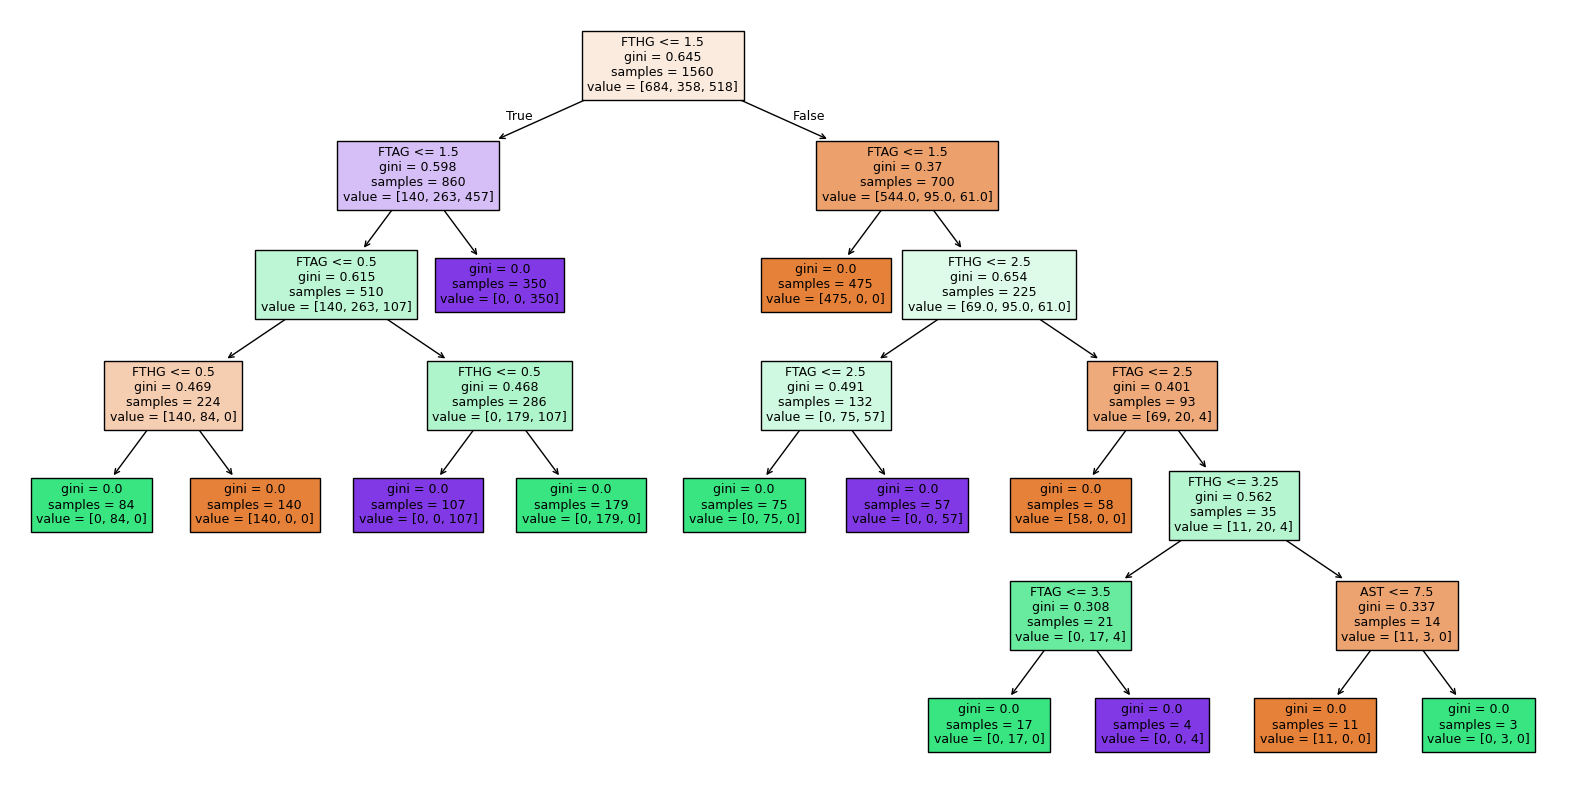

In [82]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    dtree_estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- Our final tree after tuning the decision tree.

In [83]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_estimator, feature_names=feature_names, show_weights=True))

|--- FTHG <= 1.50
|   |--- FTAG <= 1.50
|   |   |--- FTAG <= 0.50
|   |   |   |--- FTHG <= 0.50
|   |   |   |   |--- weights: [0.00, 84.00, 0.00] class: 2
|   |   |   |--- FTHG >  0.50
|   |   |   |   |--- weights: [140.00, 0.00, 0.00] class: 1
|   |   |--- FTAG >  0.50
|   |   |   |--- FTHG <= 0.50
|   |   |   |   |--- weights: [0.00, 0.00, 107.00] class: 3
|   |   |   |--- FTHG >  0.50
|   |   |   |   |--- weights: [0.00, 179.00, 0.00] class: 2
|   |--- FTAG >  1.50
|   |   |--- weights: [0.00, 0.00, 350.00] class: 3
|--- FTHG >  1.50
|   |--- FTAG <= 1.50
|   |   |--- weights: [475.00, 0.00, 0.00] class: 1
|   |--- FTAG >  1.50
|   |   |--- FTHG <= 2.50
|   |   |   |--- FTAG <= 2.50
|   |   |   |   |--- weights: [0.00, 75.00, 0.00] class: 2
|   |   |   |--- FTAG >  2.50
|   |   |   |   |--- weights: [0.00, 0.00, 57.00] class: 3
|   |   |--- FTHG >  2.50
|   |   |   |--- FTAG <= 2.50
|   |   |   |   |--- weights: [58.00, 0.00, 0.00] class: 1
|   |   |   |--- FTAG >  2.50
|   |   |   

In [84]:
'''
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
'''

'\nimportances = dtree_estimator.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(12, 12))\nplt.title("Feature Importances")\nplt.barh(range(len(indices)), importances[indices], color="violet", align="center")\nplt.yticks(range(len(indices)), [feature_names[i] for i in indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

- The tree has only remained with one important feature after tuning, this is no capacity.

### Bagging Classifier

In [85]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

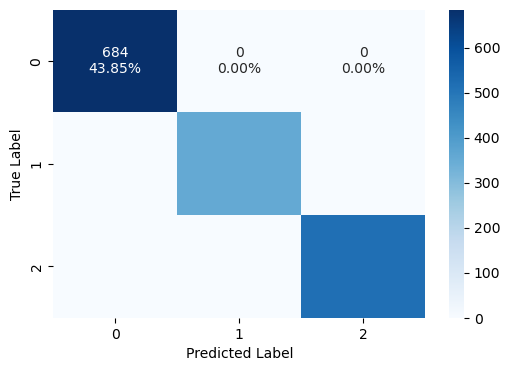

In [86]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [87]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

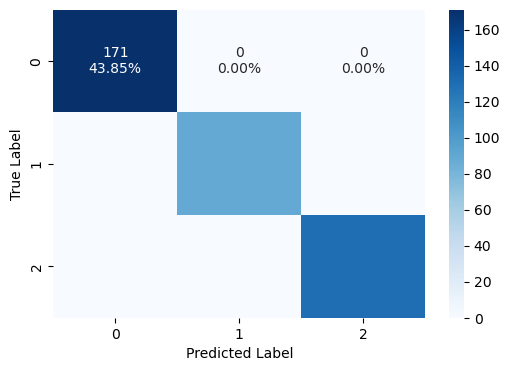

In [88]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [89]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


- No overfitting on the training data.

**Tuning Bagging Classifier**

In [90]:
# Define the base estimator
cl1 = DecisionTreeClassifier(random_state=1)

# Define the parameter grid for the BaggingClassifier
param_grid = {
    'estimator': [cl1],  # Correct parameter name is 'estimator'
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

# Initialize GridSearchCV with the BaggingClassifier
grid = GridSearchCV(BaggingClassifier(random_state=1, bootstrap=True), 
                    param_grid=param_grid, 
                    scoring='recall', 
                    cv=5)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Get the best estimator
best_model = grid.best_estimator_

# Print the best parameters
print("Best Parameters: ", grid.best_params_)

# Use the best estimator to predict
y_pred = best_model.predict(X_test)

# Calculate and print the recall score
recall_test = metrics.recall_score(y_test, y_pred, average='macro')
print(f"Recall on test data: {recall_test}")


Best Parameters:  {'estimator': DecisionTreeClassifier(random_state=1), 'max_features': 0.7, 'n_estimators': 5}
Recall on test data: 0.8960637934026462


In [91]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, n_estimators=5, random_state=1)

#### Checking model performance on training set

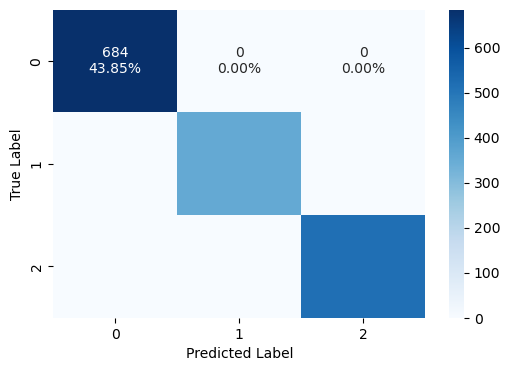

In [92]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [93]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

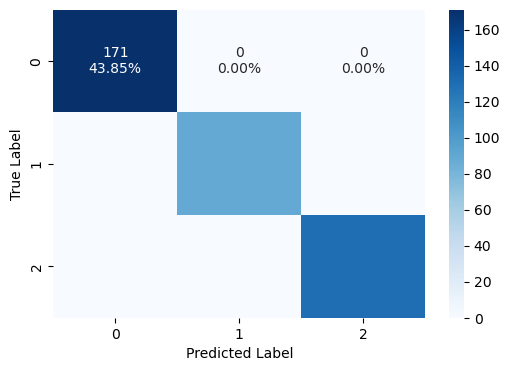

In [94]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [95]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**Tuning Bagging Classifier**

In [96]:
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {
    'estimator': [cl1],  # Use 'estimator' instead of 'base_estimator'
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

grid = GridSearchCV(BaggingClassifier(random_state=1, bootstrap=True), param_grid=param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [97]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.7, n_estimators=5, random_state=1)

#### Checking model performance on training set

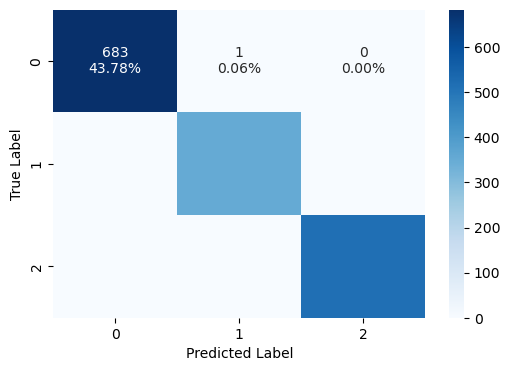

In [98]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [99]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.996154  0.996154   0.996151  0.99615


#### Checking model performance on testing set

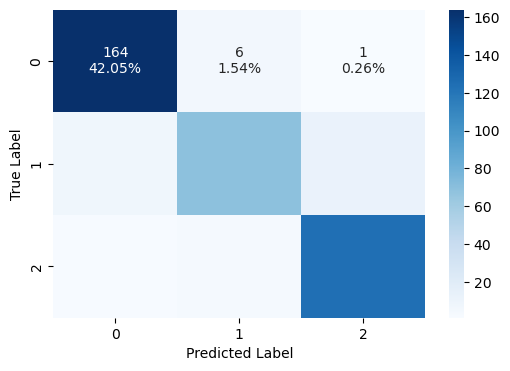

In [100]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [101]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.915385  0.915385   0.914284  0.913923


- The model still performed well after tuning.

### Random Forest

In [102]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

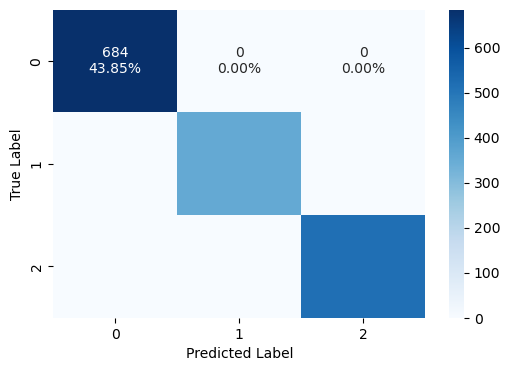

In [103]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [104]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

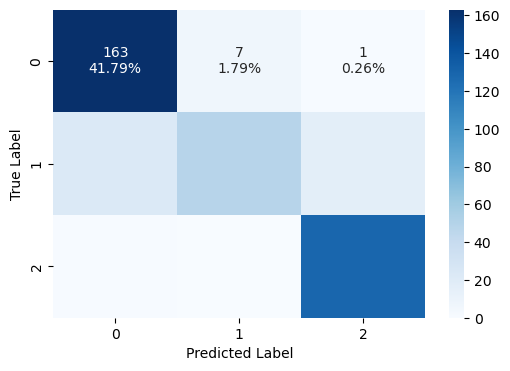

In [105]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [106]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.874359  0.874359   0.874385  0.863974


- The model shows some slight overfitting on the train data

**Tuning Random Forest**

In [107]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                       random_state=1)

#### Checking model performance on training set

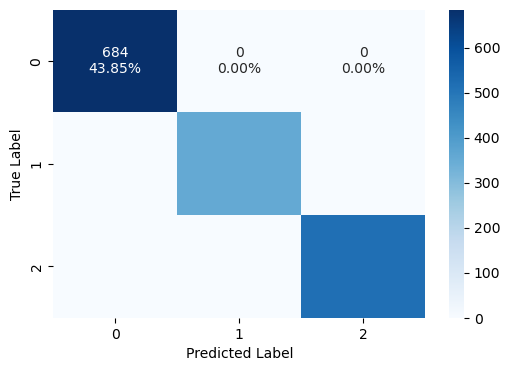

In [108]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [109]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

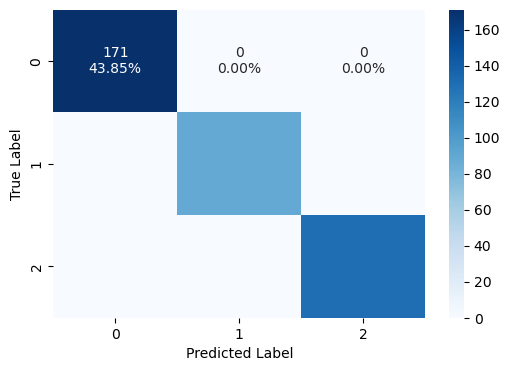

In [110]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [111]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


- After tuning the random forest there is no overfitting on the training data.

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.659615  0.659615   0.862927  0.676266
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.684615  0.684615   0.867598  0.704145


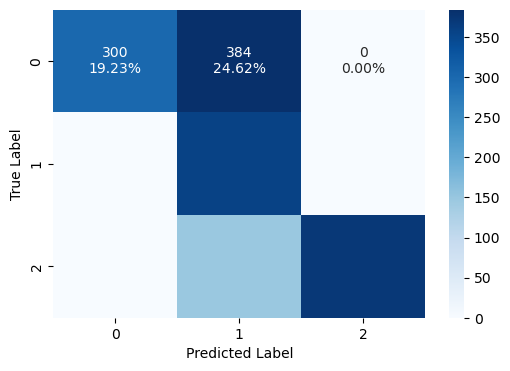

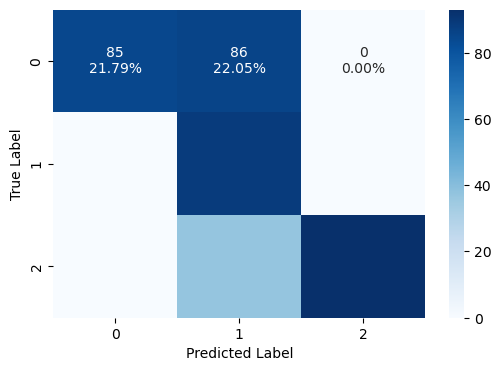

In [112]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

#Creating confusion matrix on training set
confusion_matrix_sklearn(ab_classifier,X_train,y_train)
#Creating confusion matrix on testing set
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

 **Tuning AdaBoost Classifier**

In [114]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Use 'estimator' instead of 'base_estimator'
    "estimator": [DecisionTreeClassifier(max_depth=1), 
                  DecisionTreeClassifier(max_depth=2),     
                  DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.867949  0.867949   0.867104  0.867002
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.858974  0.858974   0.858423  0.858393


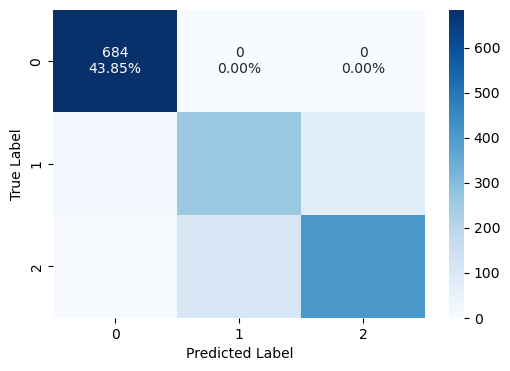

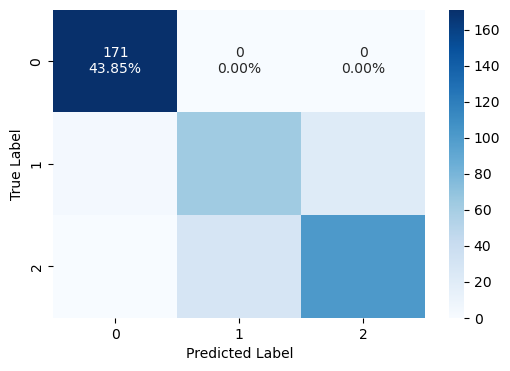

In [115]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

#Creating confusion matrix for training
confusion_matrix_sklearn(abc_tuned,X_train,y_train)
#Creating confusion matrix for testing
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

## Gradient Boosting Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


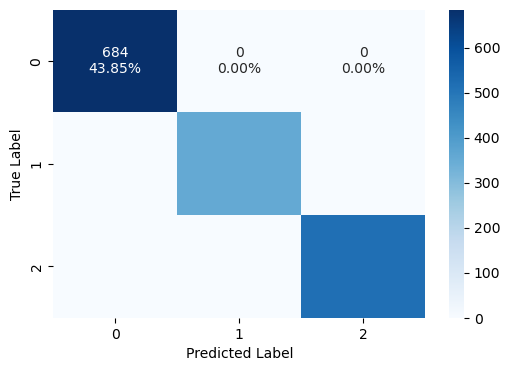

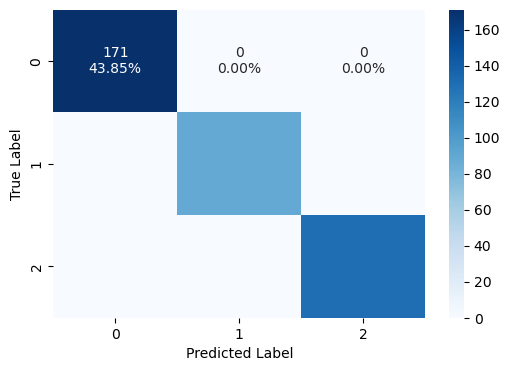

In [116]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix training set
confusion_matrix_sklearn(gb_classifier,X_train,y_train)
#Creating confusion matrix testing set
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

**Tuning Gradient Boosting Classifier**

In [117]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


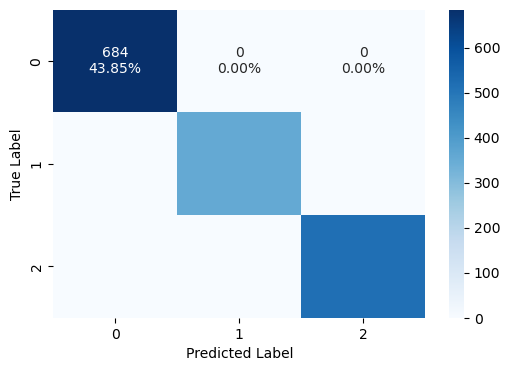

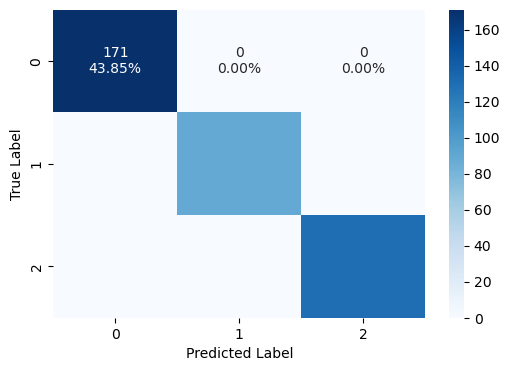

In [118]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix for training
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)
#Creating confusion matrix for testing
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

## Comparing all models

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        decision_tree_tune_perf_train.T,
        pruned_dtree_model_train_perf.T,
        decision_tree_post_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Pre-pruned",
    "Decision Tree Pruned",
    "Decision Tree Post-pruned",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Pre-pruned,Decision Tree Pruned,Decision Tree Post-pruned,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.758333,0.998077,0.998077,1.0,1.0,0.996154,1.0,1.0,0.659615,0.867949,1.0,1.0
Recall,1.0,0.758333,0.998077,0.998077,1.0,1.0,0.996154,1.0,1.0,0.659615,0.867949,1.0,1.0
Precision,1.0,0.882290,0.998085,0.998085,1.0,1.0,0.996151,1.0,1.0,0.862927,0.867104,1.0,1.0
F1,1.0,0.777510,0.998075,0.998075,1.0,1.0,0.996150,1.0,1.0,0.676266,0.867002,1.0,1.0


In [120]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        decision_tree_tune_perf_test.T,
        pruned_dtree_model_test_perf.T,
        decision_tree_post_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Pre-pruned",
    "Decision Tree Pruned",
    "Decision Tree Post-pruned",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Pre-pruned,Decision Tree Pruned,Decision Tree Post-pruned,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.992308,0.771795,1.0,1.0,0.992308,1.0,0.915385,0.874359,1.0,0.684615,0.858974,1.0,1.0
Recall,0.992308,0.771795,1.0,1.0,0.992308,1.0,0.915385,0.874359,1.0,0.684615,0.858974,1.0,1.0
Precision,0.992559,0.885897,1.0,1.0,0.992559,1.0,0.914284,0.874385,1.0,0.867598,0.858423,1.0,1.0
F1,0.992337,0.790031,1.0,1.0,0.992337,1.0,0.913923,0.863974,1.0,0.704145,0.858393,1.0,1.0


### Important features of the final model

In [121]:
'''
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
'''

'\nfeature_names = X_train.columns\nimportances = gb_classifier.feature_importances_\nindices = np.argsort(importances)\n\nplt.figure(figsize=(12, 12))\nplt.title("Feature Importances")\nplt.barh(range(len(indices)), importances[indices], color="violet", align="center")\nplt.yticks(range(len(indices)), [feature_names[i] for i in indices])\nplt.xlabel("Relative Importance")\nplt.show()\n'

## Actionable Insights and Recommendations
- We can either select gradient boost classifier, tuned gradient boost classifier, Tuned random forest and bagging classifier.
- Gradient boost classifier will therefore be chosen for deployment.

## Saving Gradient Boost Classifier Model For Deployment

In [122]:
import joblib
# Save the model to a .pkl file
joblib.dump(gb_classifier, 'model.pkl')


['model.pkl']